# Week 8 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [5]:
no_games = 8

## Functions

In [6]:
def per_week_stats(dataframe, column1, column2):
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [7]:
def per_week(dataframe, column1, no_games):
    dataframe[column1 + '_pG'] = dataframe[column1]/no_games

In [8]:
def print_metric(dataframe, metric, player_inx):
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [9]:
def print_metric_team(dataframe, metric, team_inx):
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [10]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [11]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [12]:
def scale_data(dataframe, column_list):
    for column in column_list:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])

## Read in DataFrames

In [13]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [14]:
print(offense.shape)
offense.head()

(542, 37)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8
0,Dalvin Cook,MIN,RB,25,6,6,0,0,0,0,0,122,652,8.40,10,19,14,127,9.70,1,1,1,11,3,0,154.90,1,1,147.90,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60
1,Alvin Kamara,NOR,RB,25,7,5,0,0,0,0,0,87,431,13.50,4,66,55,556,11.10,3,1,0,7,0,0,168.20,2,2,140.70,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30
2,Derrick Henry,TEN,RB,26,7,7,0,0,0,0,0,161,775,12.10,8,18,10,81,9.00,0,0,0,8,0,0,138.60,3,3,133.60,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20
3,Patrick Mahomes,KAN,QB,25,8,8,190,284,2315,21,1,34,165,12.50,2,0,0,0,0.00,0,1,0,2,0,2,208.10,1,4,208.00,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60
4,Russell Wilson,SEA,QB,32,7,7,183,256,2151,26,6,35,260,11.30,0,0,0,0,0.00,0,1,0,0,0,1,212.00,2,5,212.00,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70


In [15]:
print(defense.shape)
defense.head()

(32, 32)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8
0,Miami Dolphins,7,130,467,5.60,2632,178,876,4.90,9,270,6.10,165,11.60,1756,8,22,15,68.20,13,7,6,19,63.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00
1,Baltimore Ravens,7,132,447,5.10,2260,159,702,4.40,5,264,5.40,170,10.20,1558,10,16,13,81.30,12,3,9,24,74.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00
2,Indianapolis Colts,7,136,418,4.90,2054,164,559,3.40,4,236,5.90,144,11.20,1495,10,18,12,66.70,12,11,1,18,76.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00
3,Pittsburgh Steelers,7,142,429,5.10,2175,169,678,4.00,5,230,5.80,131,12.90,1497,13,20,13,65.00,13,10,3,30,74.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00
4,Arizona Cardinals,7,146,485,5.50,2649,195,918,4.70,4,271,6.00,171,11.00,1731,12,27,12,44.40,10,6,4,19,47.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00


In [142]:
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Passing_TDs', 'GP')
per_week_stats(defense, 'Ttl_Turnovers', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [143]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG,Ttl_Turnovers_pG
0,Miami Dolphins,7,130,467,5.60,2632,178,876,4.90,9,270,6.10,165,11.60,1756,8,22,15,68.20,13,7,6,19,63.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,18.57,376.00,25.43,125.14,38.57,23.57,0.61,250.86,1.14,2.71,9.00,1.86
1,Baltimore Ravens,7,132,447,5.10,2260,159,702,4.40,5,264,5.40,170,10.20,1558,10,16,13,81.30,12,3,9,24,74.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,18.86,322.86,22.71,100.29,37.71,24.29,0.64,222.57,1.43,3.43,10.57,1.71
2,Indianapolis Colts,7,136,418,4.90,2054,164,559,3.40,4,236,5.90,144,11.20,1495,10,18,12,66.70,12,11,1,18,76.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,19.43,293.43,23.43,79.86,33.71,20.57,0.61,213.57,1.43,2.57,10.86,1.71
3,Pittsburgh Steelers,7,142,429,5.10,2175,169,678,4.00,5,230,5.80,131,12.90,1497,13,20,13,65.00,13,10,3,30,74.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,20.29,310.71,24.14,96.86,32.86,18.71,0.57,213.86,1.86,4.29,10.57,1.86
4,Arizona Cardinals,7,146,485,5.50,2649,195,918,4.70,4,271,6.00,171,11.00,1731,12,27,12,44.40,10,6,4,19,47.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,20.86,378.43,27.86,131.14,38.71,24.43,0.63,247.29,1.71,2.71,6.71,1.43


In [18]:
offense[offense['Player'] == "J.K. Dobbins"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8
131,J.K. Dobbins,BAL,RB,22,7,0,0,0,0,0,0,40,267,12.80,2,16,12,82,14.30,0,0,0,2,0,0,52.90,39,,46.90,14.20,6.10,4.40,1.70,5.50,2.90,0.00,12.10


In [95]:
taken_wrt = ['Davante Adams', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', "Le'Veon Bell", 
             'A.J. Brown', 'Antonio Brown', 'John Brown', 'Marquise Brown', 'DJ Chark', 'Nick Chubb', 
             'Chase Claypool', 'James Conner', 'Dalvin Cook', 'Jared Cook', 'Amari Cooper', 'Mike Davis', 
             'Stefon Diggs', 'J.K. Dobbins', 'Chase Edmonds', 'Clyde Edwards-Helaire', 'Austen Ekeler', 
             'Ezekiel Elliott', 'Evan Engram', 'Zach Ertz', 'Mike Evans', 'Noah Fant', 'Travis Fulgham', 
             'Will Fuller', 'Mike Gesicki', 'Antonio Gibson', 'Kenny Golladay', 'Chris Godwin', 'Melvin Gordon', 
             'Todd Gurley', 'Hunter Henry', 'Tyler Higbee', 'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 
             'Jordan Howard', 'Kareem Hunt', 'Hayden Hurst', 'Josh Jacobs', 'Justin Jefferson', 'David Johnson', 
             'Aaron Jones', 'Ronald Jones II', 'Alvin Kamara', 'Travis Kelce', 'George Kittle', 'Cooper Kupp', 
             'CeeDee Lamb', 'Phillip Lindsay', 'Tyler Lockett', 'Christian McCaffrey', 'Jerick McKinnon', 
             'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon', 'David Montgomery', 'D.J. Moore', 'Zack Moss', 
             'DeVante Parker', 'Calvin Ridley', 'James Robinson', 'Allen Robinson', 'Miles Sanders', 
             'Devin Singletary', 'Darius Slayton', 'JuJu Smith-Schuster', 'Jonathan Taylor', 'Adam Thielen',
             'Michael Thomas', 'Darren Waller', 'Robert Woods']


In [20]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Joe Burrow', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Baker Mayfield', 'Kyler Murray', 'Ben Roethlisberger', 'Matt Ryan', 
             'Ryan Tannehill', 'Deshaun Watson', 'Russell Wilson']

In [21]:
taken_k = ['Rodrigo Blankenship', 'Harrison Butker', 'Jake Elliot', 'Jake Elliott', 'Matt Gay', 'Wil Lutz', 
           'Jason Meyers', 'Joey Slye', 'Justin Tucker', 'Greg Zuerlein']

In [22]:
myteam_wrt = ['Robby Anderson', 'Tyler Boyd', 'Chris Carson', 'Jamison Crowder', 'Rob Gronkowski', 
              'Darrell Henderson', 'Derrick Henry', 'DeAndre Hopkins', 'Diontae Johnson', 'Julio Jones', 
              'Jonnu Smith']


## QB Analysis

In [23]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8
3,Patrick Mahomes,KAN,QB,25,8,8,190,284,2315,21,1,34,165,12.50,2,0,0,0,0.00,0,1,0,2,0,2,208.10,1,4,208.00,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60
4,Russell Wilson,SEA,QB,32,7,7,183,256,2151,26,6,35,260,11.30,0,0,0,0,0.00,0,1,0,0,0,1,212.00,2,5,212.00,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70
6,Kyler Murray,ARI,QB,23,7,7,169,253,1847,13,7,65,437,13.20,7,0,0,0,0.00,0,3,1,7,0,0,202.60,3,7,202.50,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00
15,Josh Allen,BUF,QB,24,8,8,186,277,2172,16,5,58,227,12.10,4,0,0,0,0.00,0,4,4,4,0,0,184.60,4,16,184.60,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50
24,Tom Brady,TAM,QB,43,8,8,204,308,2189,20,4,17,6,3.50,2,0,0,0,0.00,0,4,1,2,0,0,174.20,5,25,174.30,22.50,9.70,23.90,33.50,14.10,14.60,36.90,19.10


In [24]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [25]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
3,Patrick Mahomes,KAN,QB,25,8,8,190,284,2315,21,1,34,165,12.50,2,0,0,0,0.00,0,1,0,2,0,2,208.10,1,4,208.00,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,23.75,35.50,0.67,289.38,2.62,8.15,0.12,0.00,20.62,26.00
4,Russell Wilson,SEA,QB,32,7,7,183,256,2151,26,6,35,260,11.30,0,0,0,0,0.00,0,1,0,0,0,1,212.00,2,5,212.00,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,26.14,36.57,0.71,307.29,3.71,8.40,0.86,0.00,37.14,30.29
6,Kyler Murray,ARI,QB,23,7,7,169,253,1847,13,7,65,437,13.20,7,0,0,0,0.00,0,3,1,7,0,0,202.60,3,7,202.50,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,24.14,36.14,0.67,263.86,1.86,7.30,1.00,0.14,62.43,28.93
15,Josh Allen,BUF,QB,24,8,8,186,277,2172,16,5,58,227,12.10,4,0,0,0,0.00,0,4,4,4,0,0,184.60,4,16,184.60,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,23.25,34.62,0.67,271.50,2.00,7.84,0.62,0.50,28.38,23.07
24,Tom Brady,TAM,QB,43,8,8,204,308,2189,20,4,17,6,3.50,2,0,0,0,0.00,0,4,1,2,0,0,174.20,5,25,174.30,22.50,9.70,23.90,33.50,14.10,14.60,36.90,19.10,25.50,38.50,0.66,273.62,2.50,7.11,0.50,0.12,0.75,21.79


In [26]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
count,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,57.00,59.00,59.00,57.00,59.00,59.00,59.00,59.00
mean,28.69,4.95,4.08,93.02,141.81,1035.98,7.03,3.25,16.32,73.92,6.21,0.92,0.24,0.20,1.31,0.68,0.03,2.02,0.90,0.95,0.03,0.41,78.76,78.66,10.56,11.07,10.78,10.28,8.94,8.88,9.83,8.34,15.39,23.88,0.63,168.57,1.07,6.64,0.55,0.17,11.31,12.33
std,5.30,2.55,3.24,76.04,113.15,863.63,6.99,2.94,16.32,103.56,4.32,1.52,0.95,0.71,7.35,3.35,0.18,1.93,1.20,1.56,0.18,0.87,69.40,69.40,10.66,12.15,11.21,11.10,10.50,10.77,12.31,9.67,9.38,13.78,0.15,109.72,0.94,2.20,0.45,0.23,14.64,9.05
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,-2.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.00,0.00
25%,24.00,3.00,0.50,12.50,23.50,113.00,0.00,0.00,5.00,1.00,3.15,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,7.00,6.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.33,12.67,0.59,56.50,0.00,5.42,0.00,0.00,0.45,3.17
50%,27.00,6.00,5.00,94.00,146.00,1045.00,4.00,3.00,11.00,26.00,6.70,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,67.60,67.60,10.90,9.70,11.40,5.50,2.40,1.80,1.90,2.80,17.17,27.14,0.66,190.50,1.00,6.88,0.62,0.12,7.29,13.90
75%,32.00,7.00,7.00,166.50,246.00,1855.50,13.00,5.00,22.50,112.00,9.50,1.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,0.00,1.00,137.70,137.45,19.40,19.45,18.35,20.65,17.95,17.15,17.95,17.70,23.34,35.32,0.68,264.43,1.83,7.82,0.85,0.25,18.01,19.33
max,43.00,8.00,8.00,221.00,330.00,2462.00,26.00,12.00,66.00,437.00,13.70,7.00,7.00,5.00,53.00,16.00,1.00,8.00,4.00,7.00,1.00,5.00,212.00,212.00,31.80,39.80,40.00,38.30,30.70,32.00,38.50,36.60,30.20,44.40,1.00,371.20,3.71,13.50,1.50,1.00,62.43,30.29


In [27]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers', 'Justin Herbert'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
45,Aaron Rodgers,GNB,QB,37,7,7,164,249,1948,20,2,10,54,9.00,0,1,1,-6,-6.00,0,1,1,0,0,0,159.20,6,46,158.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,23.43,35.57,0.66,278.29,2.86,7.82,0.29,0.14,7.71,22.67
77,Justin Herbert,LAC,QB,22,6,6,153,227,1820,15,5,28,142,5.70,2,0,0,0,0.00,0,3,1,2,0,0,152.00,12,78,152.00,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,25.50,37.83,0.67,303.33,2.50,8.02,0.83,0.17,23.67,25.33


In [28]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
45,Aaron Rodgers,GNB,QB,37,7,7,164,249,1948,20,2,10,54,9.00,0,1,1,-6,-6.00,0,1,1,0,0,0,159.20,6,46,158.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,23.43,35.57,0.66,278.29,2.86,7.82,0.29,0.14,7.71,22.67
63,Carson Wentz,PHI,QB,28,8,8,178,305,1883,12,12,39,202,6.80,5,0,0,0,0.00,0,7,4,5,0,5,163.50,8,64,163.50,15.00,14.40,23.50,22.40,19.40,29.40,28.80,10.60,22.25,38.12,0.58,235.38,1.50,6.17,1.50,0.50,25.25,20.44
77,Justin Herbert,LAC,QB,22,6,6,153,227,1820,15,5,28,142,5.70,2,0,0,0,0.00,0,3,1,2,0,0,152.00,12,78,152.00,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,25.50,37.83,0.67,303.33,2.50,8.02,0.83,0.17,23.67,25.33
81,Drew Brees,NOR,QB,41,7,7,185,253,1898,13,3,12,4,3.30,2,0,0,0,0.00,0,3,1,2,0,0,135.30,16,,135.30,14.40,15.50,23.50,16.50,22.10,0.00,23.70,19.60,26.43,36.14,0.73,271.14,1.86,7.50,0.43,0.14,0.57,19.33
82,Teddy Bridgewater,CAR,QB,28,8,8,184,257,2106,9,6,30,161,8.70,1,0,0,0,0.00,0,1,1,1,0,1,136.30,18,,136.30,19.40,10.70,14.60,27.20,20.80,11.40,19.20,13.00,23.00,32.12,0.72,263.25,1.12,8.19,0.75,0.12,20.12,17.04


In [29]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

qb_columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
               'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG']

scale_data(scaled_qbs, qb_columns)

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
45,Aaron Rodgers,GNB,QB,37,7,7,1.21,1.16,0.20,1.39,2.65,7.82,-0.46,-0.06,0.03,22.67
63,Carson Wentz,PHI,QB,28,8,8,1.08,1.35,-0.25,0.98,0.94,6.17,1.99,1.49,1.74,20.44
77,Justin Herbert,LAC,QB,22,6,6,1.44,1.33,0.29,1.64,2.20,8.02,0.64,0.05,1.58,25.33
81,Drew Brees,NOR,QB,41,7,7,1.54,1.21,0.63,1.32,1.39,7.50,-0.17,-0.06,-0.67,19.33
82,Teddy Bridgewater,CAR,QB,28,8,8,1.16,0.91,0.54,1.25,0.47,8.19,0.47,-0.14,1.24,17.04


In [30]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [31]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [32]:
scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
77,Justin Herbert,LAC,QB,22,6,6,1.44,1.33,0.29,1.64,2.20,8.02,0.64,0.05,1.58,25.33,41.15
45,Aaron Rodgers,GNB,QB,37,7,7,1.21,1.16,0.20,1.39,2.65,7.82,-0.46,-0.06,0.03,22.67,37.66
87,Ryan Fitzpatrick,MIA,QB,38,6,6,1.16,0.96,0.45,1.18,1.15,7.79,1.31,-0.68,1.47,20.97,34.49
81,Drew Brees,NOR,QB,41,7,7,1.54,1.21,0.63,1.32,1.39,7.50,-0.17,-0.06,-0.67,19.33,32.49
85,Matthew Stafford,DET,QB,32,7,7,1.00,1.13,-0.07,1.35,1.39,7.79,0.40,-0.06,0.35,18.76,31.36


In [33]:
qb1 = 45
qb2 = 77

Avg PassingYds_pG: 168.57
Aaron Rodgers PassingYds_pG: 278.29
--------------------------------------------------
Avg PassingYds_pG: 168.57
Justin Herbert PassingYds_pG: 303.33
--------------------------------------------------


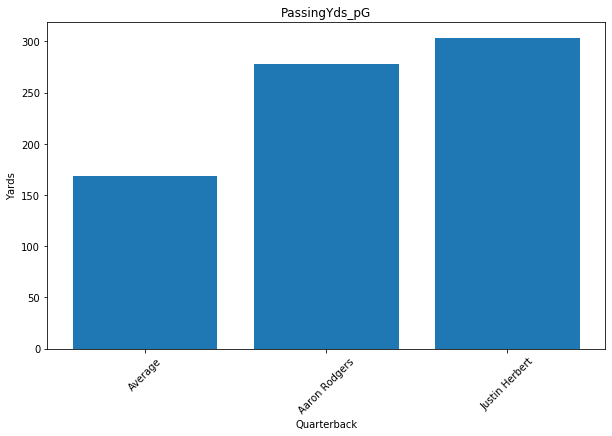

In [34]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg PassesAttempted_pG: 23.88
Aaron Rodgers PassesAttempted_pG: 35.57
--------------------------------------------------
Avg PassesAttempted_pG: 23.88
Justin Herbert PassesAttempted_pG: 37.83
--------------------------------------------------


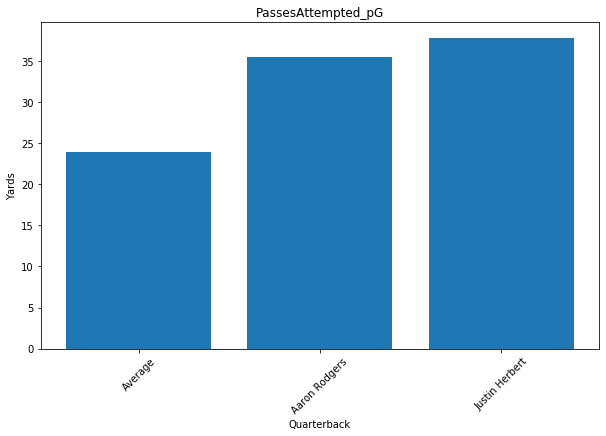

In [35]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

Avg Completion_Percent: 0.63
Aaron Rodgers Completion_Percent: 0.66
--------------------------------------------------
Avg Completion_Percent: 0.63
Justin Herbert Completion_Percent: 0.67
--------------------------------------------------


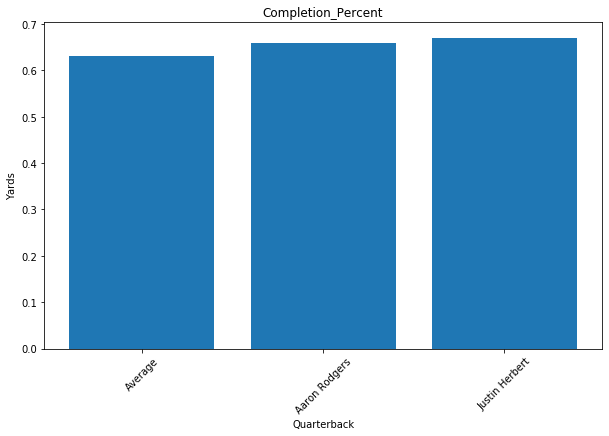

In [36]:
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

Avg RushingYds_pG: 11.31
Aaron Rodgers RushingYds_pG: 7.71
--------------------------------------------------
Avg RushingYds_pG: 11.31
Justin Herbert RushingYds_pG: 23.67
--------------------------------------------------


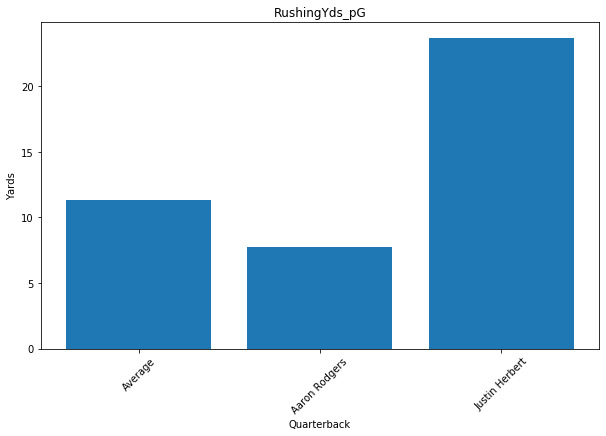

In [37]:
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

Week 7 match ups:
    
    Green Bay vs Minnesota
    Los Angeles Chargers vs Denver
 

In [38]:
qb_opp = ['San Francisco 49ers', 'Las Vegas Raiders']

In [39]:
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG
11,San Francisco 49ers,8,173,484,5.20,2517,210,845,4.00,5,260,6.10,165,10.60,1672,12,19,11,57.90,10,8,2,14,43.00,4.00,5.00,12.00,6.00,-2.00,3.00,17.00,-2.00,21.62,314.62,26.25,105.62,32.50,20.62,0.63,209.00,1.50,1.75,5.38
21,Las Vegas Raiders,7,204,432,6.10,2645,178,820,4.60,12,247,7.20,156,11.90,1825,11,29,20,69.00,4,3,1,7,14.00,0.00,2.00,3.00,0.00,4.00,0.00,-4.00,9.00,29.14,377.86,25.43,117.14,35.29,22.29,0.63,260.71,1.57,1.00,2.00


In [40]:
def1 = 11
def2 = 21

Avg RZ_Percent: 63.2
San Francisco 49ers RZ_Percent: 57.9
--------------------------------------------------
Avg RZ_Percent: 63.2
Las Vegas Raiders RZ_Percent: 69.0
--------------------------------------------------


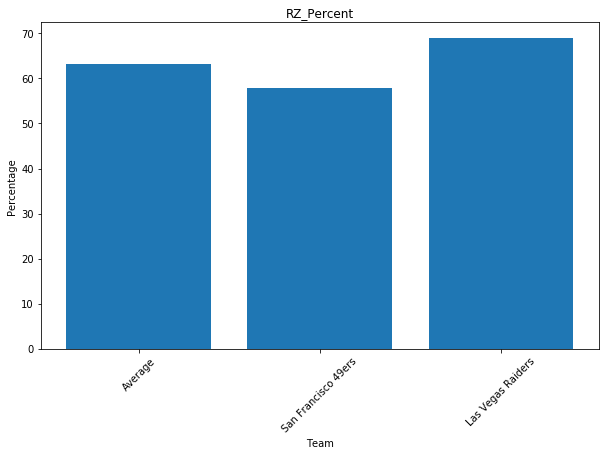

In [41]:
average, defteam1, team1 = print_metric_team(defense, 'RZ_Percent', def1)
average, defteam2, team2 = print_metric_team(defense, 'RZ_Percent', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'RZ_Percent', 'Team', 'Percentage')

Avg Passing_Yds_pG: 240.93
San Francisco 49ers Passing_Yds_pG: 209.0
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
Las Vegas Raiders Passing_Yds_pG: 260.71
--------------------------------------------------


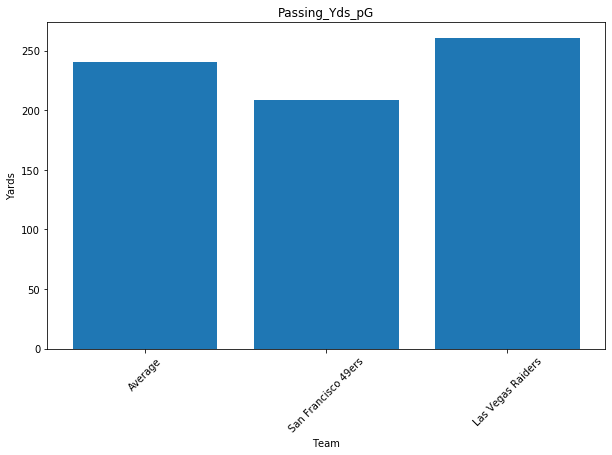

In [42]:
average, defteam1, team1 = print_metric_team(defense, 'Passing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Avg Passing_TDs_pG: 1.74
San Francisco 49ers Passing_TDs_pG: 1.5
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
Las Vegas Raiders Passing_TDs_pG: 1.57
--------------------------------------------------


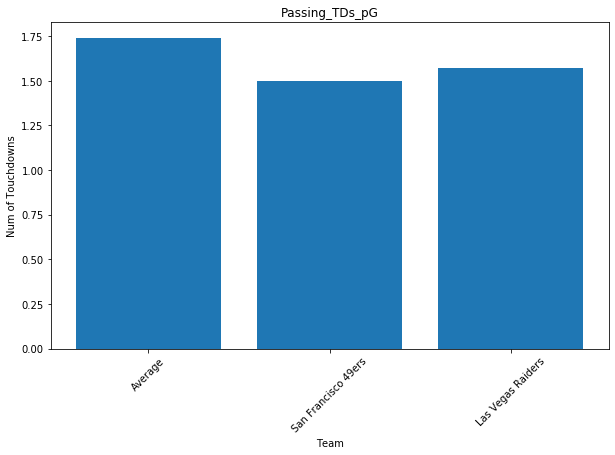

In [43]:
average, defteam1, team1 = print_metric_team(defense, 'Passing_TDs_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_TDs_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Avg Ttl_Pts_Allowed_pG: 25.22
San Francisco 49ers Ttl_Pts_Allowed_pG: 21.62
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.22
Las Vegas Raiders Ttl_Pts_Allowed_pG: 29.14
--------------------------------------------------


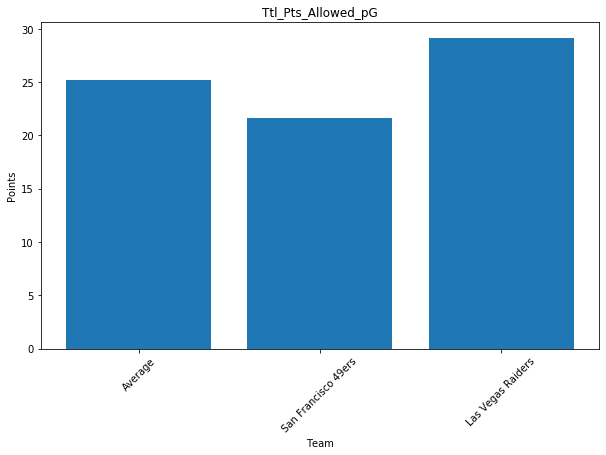

In [44]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Overall, Herbert is the most interesting quarterback when it comes to fantasy and the Raiders are an easier defense heading in to Week 9. I want him to start this week and hopefully I don't regret it.

## Runningbacks

In [45]:
runningbacks = offense[offense['Position'] == 'RB']

In [46]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'RushingTDs', 'Games')
per_week_stats(runningbacks, 'ReceivingTDs', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [47]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Dalvin Cook,MIN,RB,25,6,6,0,0,0,0,0,122,652,8.40,10,19,14,127,9.70,1,1,1,11,3,0,154.90,1,1,147.90,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,20.33,108.67,3.17,2.33,1.67,0.17,0.17
1,Alvin Kamara,NOR,RB,25,7,5,0,0,0,0,0,87,431,13.50,4,66,55,556,11.10,3,1,0,7,0,0,168.20,2,2,140.70,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,12.43,61.57,9.43,7.86,0.57,0.43,0.00
2,Derrick Henry,TEN,RB,26,7,7,0,0,0,0,0,161,775,12.10,8,18,10,81,9.00,0,0,0,8,0,0,138.60,3,3,133.60,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,23.00,110.71,2.57,1.43,1.14,0.00,0.00
10,Todd Gurley,ATL,RB,26,8,8,0,0,0,0,0,140,531,10.90,8,20,13,77,14.20,0,2,0,8,0,0,115.30,4,11,108.80,11.70,6.10,14.20,18.30,21.00,6.70,20.20,10.60,17.50,66.38,2.50,1.62,1.00,0.00,0.00
12,James Robinson,JAX,RB,22,7,7,0,0,0,0,0,107,481,9.00,4,32,27,225,11.30,2,2,1,6,1,0,120.10,5,13,106.60,9.00,18.00,24.90,10.70,5.00,11.30,27.70,0.00,15.29,68.71,4.57,3.86,0.57,0.29,0.14


In [48]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
2,Derrick Henry,TEN,RB,26,7,7,0,0,0,0,0,161,775,12.10,8,18,10,81,9.00,0,0,0,8,0,0,138.60,3,3,133.60,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,23.00,110.71,2.57,1.43,1.14,0.00,0.00
36,Chris Carson,SEA,RB,26,6,6,0,0,0,0,0,66,323,12.90,3,25,22,147,12.80,3,1,0,6,0,0,94.00,13,37,83.00,18.60,16.80,7.60,22.00,13.90,0.00,4.10,0.00,11.00,53.83,4.17,3.67,0.50,0.50,0.00
39,Darrell Henderson,LAR,RB,23,8,6,0,0,0,0,0,95,458,12.20,3,15,10,120,12.00,1,0,0,4,0,0,86.80,14,40,81.80,0.60,18.10,18.00,3.80,18.80,9.20,7.70,5.80,11.88,57.25,1.88,1.25,0.38,0.12,0.00


In [49]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [50]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'RushingAttempts_pG', 
                            'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
                            'LostFumbles_pG']]

rb_columns = ['RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 
              'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_rbs, rb_columns)

scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
2,Derrick Henry,TEN,RB,7,7,4.30,4.53,0.88,0.30,5.59,-0.43,-0.29
36,Chris Carson,SEA,RB,6,6,1.53,1.73,2.10,2.33,2.11,4.59,-0.29
39,Darrell Henderson,LAR,RB,8,6,1.73,1.90,0.35,0.13,1.44,0.83,-0.29
47,Kenyan Drake,ARI,RB,7,5,2.91,2.68,0.00,-0.09,2.50,-0.43,-0.29
74,Myles Gaskin,MIA,RB,7,5,2.29,1.81,2.73,2.89,0.95,-0.43,2.88


In [118]:
scaled_rbs['Combined_Score'] = (scaled_rbs['RushingAttempts_pG'] + scaled_rbs['RushingYds_pG'] + 
                                scaled_rbs['Targeted_pG'] + scaled_rbs['Receptions_pG'] + 
                                scaled_rbs['RushingTDs_pG'] + scaled_rbs['ReceivingTDs_pG'] - 
                                scaled_rbs['LostFumbles_pG'])

scaled_rbs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_rbs.head(10)

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
2,Derrick Henry,TEN,RB,7,7,4.30,4.53,0.88,0.30,5.59,-0.43,-0.29,15.45
36,Chris Carson,SEA,RB,6,6,1.53,1.73,2.10,2.33,2.11,4.59,-0.29,14.67
106,Raheem Mostert,SFO,RB,4,4,1.93,2.81,1.20,1.50,0.76,2.08,-0.29,10.57
136,Austin Ekeler,LAC,RB,4,4,1.82,2.14,2.16,2.86,0.76,-0.43,-0.29,9.59
116,Nyheim Hines,IND,RB,7,0,0.01,-0.28,2.40,2.37,0.18,3.87,-0.29,8.84
95,D'Andre Swift,DET,RB,7,0,0.34,0.40,2.08,1.98,2.50,1.01,-0.29,8.59
47,Kenyan Drake,ARI,RB,7,5,2.91,2.68,0.00,-0.09,2.50,-0.43,-0.29,7.87
74,Myles Gaskin,MIA,RB,7,5,2.29,1.81,2.73,2.89,0.95,-0.43,2.88,7.37
39,Darrell Henderson,LAR,RB,8,6,1.73,1.90,0.35,0.13,1.44,0.83,-0.29,6.66
103,Giovani Bernard,CIN,RB,8,2,0.14,-0.03,1.68,1.73,0.76,2.08,-0.29,6.64


In [52]:
rb1 = 2
rb2 = 36
rb3 = 39

Avg RushingAttempts_pG: 4.38
Derrick Henry RushingAttempts_pG: 23.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.38
Chris Carson RushingAttempts_pG: 11.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.38
Darrell Henderson RushingAttempts_pG: 11.88
--------------------------------------------------


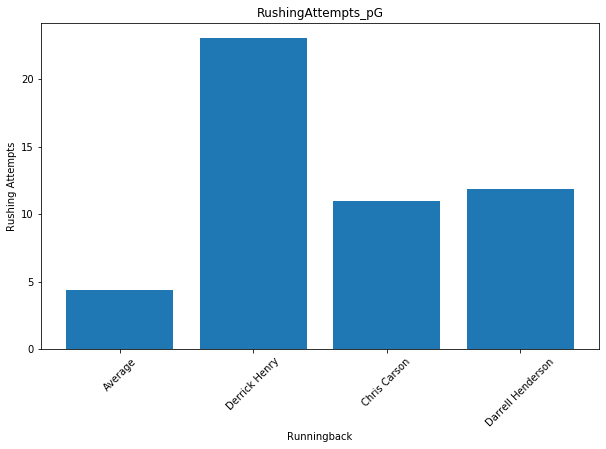

In [53]:
average, henry, derrick = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'RushingAttempts_pG', rb3)

x = ['Average', henry, carson, henderson]
y = [average, derrick, chris, darrell]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 18.51
Derrick Henry RushingYds_pG: 110.71
--------------------------------------------------
Avg RushingYds_pG: 18.51
Chris Carson RushingYds_pG: 53.83
--------------------------------------------------
Avg RushingYds_pG: 18.51
Darrell Henderson RushingYds_pG: 57.25
--------------------------------------------------


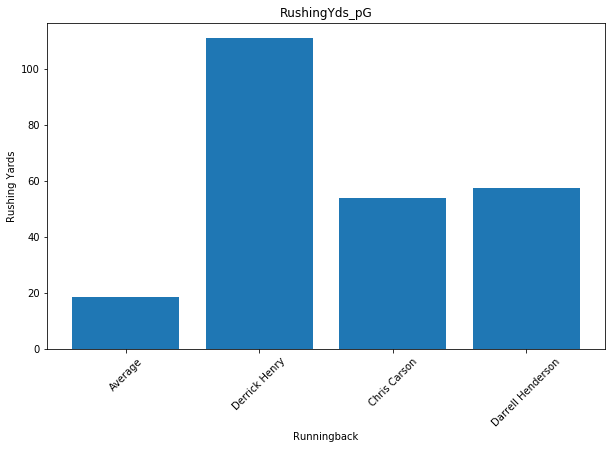

In [54]:
average, henry, derrick = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'RushingYds_pG', rb3)

x = ['Average', henry, carson, henderson]
y = [average, derrick, chris, darrell]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg Targeted_pG: 1.42
Derrick Henry Targeted_pG: 2.57
--------------------------------------------------
Avg Targeted_pG: 1.42
Chris Carson Targeted_pG: 4.17
--------------------------------------------------
Avg Targeted_pG: 1.42
Darrell Henderson Targeted_pG: 1.88
--------------------------------------------------


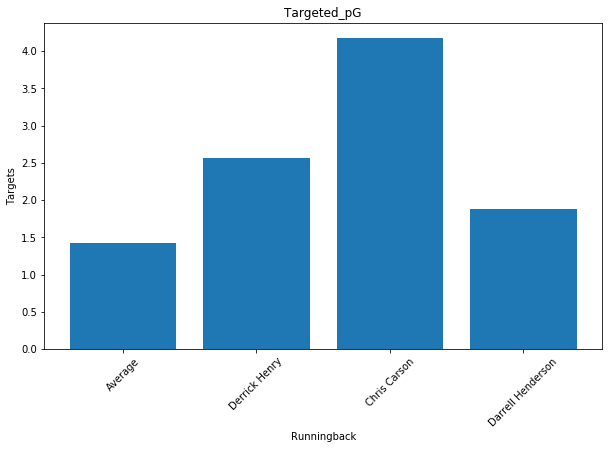

In [55]:
average, henry, derrick = print_metric(available_rbs, 'Targeted_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Targeted_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'Targeted_pG', rb3)

x = ['Average', henry, carson, henderson]
y = [average, derrick, chris, darrell]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.1
Derrick Henry Receptions_pG: 1.43
--------------------------------------------------
Avg Receptions_pG: 1.1
Chris Carson Receptions_pG: 3.67
--------------------------------------------------
Avg Receptions_pG: 1.1
Darrell Henderson Receptions_pG: 1.25
--------------------------------------------------


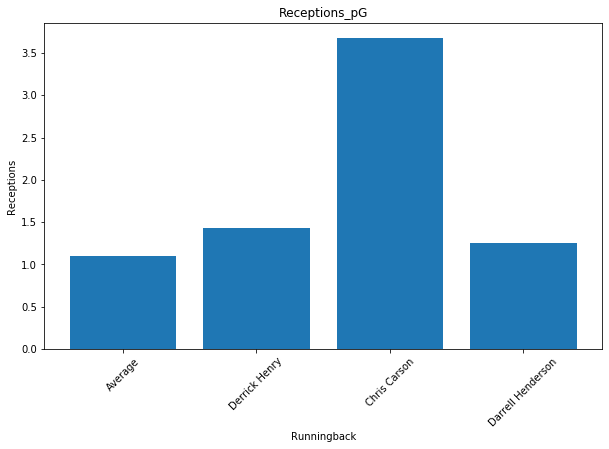

In [56]:
average, henry, derrick = print_metric(available_rbs, 'Receptions_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Receptions_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'Receptions_pG', rb3)

x = ['Average', henry, carson, henderson]
y = [average, derrick, chris, darrell]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

In [57]:
rb_opp = ['Chicago Bears', 'Buffalo Bills']

In [58]:
defense[defense['Team'].isin(rb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG
9,Chicago Bears,8,166,533,5.20,2788,223,960,4.30,6,293,5.90,179,10.80,1828,8,30,12,40.00,9,5,4,17,48.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,20.75,348.50,27.88,120.00,36.62,22.38,0.61,228.50,1.00,2.12,6.00
18,Buffalo Bills,8,199,507,5.70,2865,228,1076,4.70,11,260,6.40,176,10.70,1789,12,32,20,62.50,10,4,6,19,38.00,8.00,2.00,5.00,6.00,-4.00,3.00,14.00,4.00,24.88,358.12,28.50,134.50,32.50,22.00,0.68,223.62,1.50,2.38,4.75


In [59]:
teamRB1 = 9
teamRB2 = 18
teamRB3 = None

Avg Rushing_Att_pG: 27.01
Chicago Bears Rushing_Att_pG: 27.88
--------------------------------------------------
Avg Rushing_Att_pG: 27.01
Buffalo Bills Rushing_Att_pG: 28.5
--------------------------------------------------


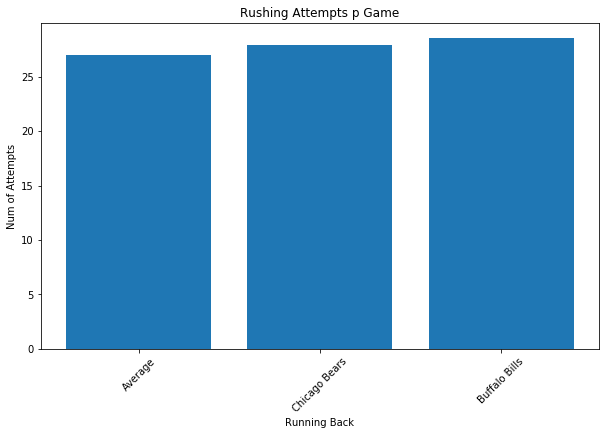

In [60]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
# average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)

x = ['Average', team_rb1, team_rb2]
y = [average, rbteam1, rbteam2]

bar_plot(x, y, 'Rushing Attempts p Game', 'Running Back', 'Num of Attempts')

Avg Rushing_Yds_pG: 118.52
Chicago Bears Rushing_Yds_pG: 120.0
--------------------------------------------------
Avg Rushing_Yds_pG: 118.52
Buffalo Bills Rushing_Yds_pG: 134.5
--------------------------------------------------


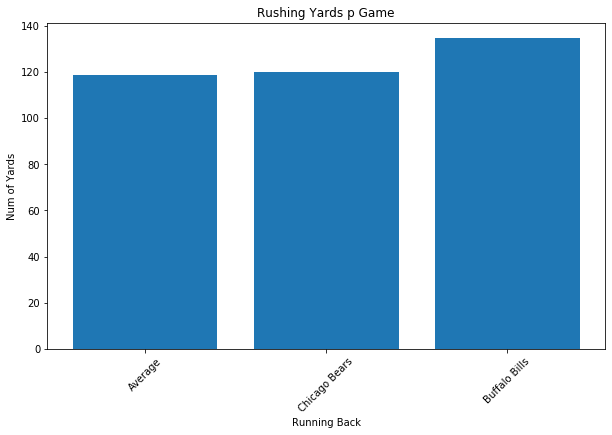

In [61]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)
# average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)

x = ['Average', team_rb1, team_rb2]
y = [average, rbteam1, rbteam2]

bar_plot(x, y, 'Rushing Yards p Game', 'Running Back', 'Num of Yards')

Avg Rushing_TDs: 7.62
Chicago Bears Rushing_TDs: 6
--------------------------------------------------
Avg Rushing_TDs: 7.62
Buffalo Bills Rushing_TDs: 11
--------------------------------------------------


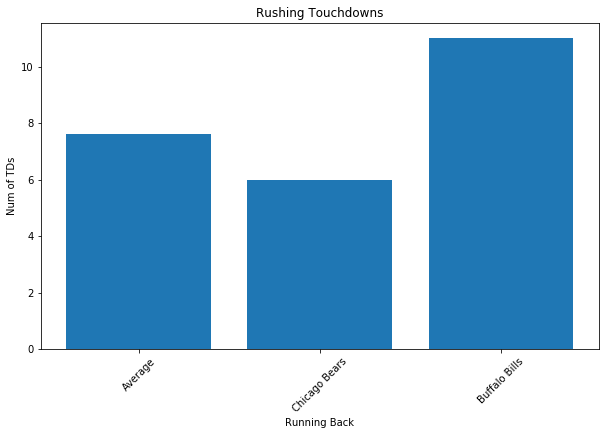

In [62]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_TDs', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_TDs', teamRB2)
# average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)

x = ['Average', team_rb1, team_rb2]
y = [average, rbteam1, rbteam2]

bar_plot(x, y, 'Rushing Touchdowns', 'Running Back', 'Num of TDs')


## Tight End

In [63]:
tight_ends = offense[offense['Position'] == 'TE']

In [64]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')
per_week_stats(tight_ends, 'LostFumbles', 'Games')

In [65]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
5,Travis Kelce,KAN,TE,31,8,8,0,0,0,0,0,0,0,0.00,0,68,48,610,19.10,6,1,1,6,0,0,119.00,1,6,95.00,11.00,15.00,8.70,7.00,16.80,16.50,3.10,16.90,8.50,6.00,76.25,0.75,0.12
33,George Kittle,SFO,TE,27,6,6,0,0,0,0,0,2,17,13.00,0,49,37,474,20.10,2,0,0,2,0,0,79.60,2,34,61.10,5.30,0.00,0.00,25.10,4.40,16.90,5.50,3.90,8.17,6.17,79.00,0.33,0.00
34,Robert Tonyan,GNB,TE,26,7,6,0,0,0,0,0,0,0,0.00,0,27,23,309,17.30,5,0,0,5,0,0,72.40,3,35,60.90,0.00,8.50,11.00,27.80,0.00,2.50,3.20,7.90,3.86,3.29,44.14,0.71,0.00
37,T.J. Hockenson,DET,TE,23,7,7,0,0,0,0,0,0,0,0.00,0,41,29,321,11.70,4,0,0,4,1,0,72.60,4,38,58.10,11.60,6.20,5.30,8.90,0.00,7.70,11.90,6.50,5.86,4.14,45.86,0.57,0.00
40,Mark Andrews,BAL,TE,24,7,1,0,0,0,0,0,0,0,0.00,0,39,23,275,20.60,5,2,0,5,0,0,69.00,5,41,57.50,17.80,2.90,2.20,17.70,11.60,2.10,0.00,3.20,5.57,3.29,39.29,0.71,0.00


In [66]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
42,Jonnu Smith,TEN,TE,25,7,7,0,0,0,0,0,0,0,0.00,0,35,22,272,15.60,5,0,0,5,0,0,68.20,6,43,57.20,9.60,20.40,6.10,0.00,16.00,1.30,0.90,2.90,5.00,3.14,38.86,0.71,0.00
59,Rob Gronkowski,TAM,TE,31,8,8,0,0,0,0,0,0,0,0.00,0,40,26,321,15.50,3,1,0,3,0,0,63.10,9,60,50.10,1.10,0.00,4.80,2.90,5.20,13.80,12.20,10.10,5.00,3.25,40.12,0.38,0.00


In [67]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]

In [68]:
scaled_te = available_te[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'Targeted_pG', 
                          'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

te_columns = ['Targeted_pG', 'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_te, te_columns)

scaled_te.head()

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
34,Robert Tonyan,GNB,TE,26,7,6,1.05,1.62,2.23,3.06,-0.33
42,Jonnu Smith,TEN,TE,25,7,7,1.73,1.50,1.82,3.06,-0.33
59,Rob Gronkowski,TAM,TE,31,8,8,1.73,1.59,1.92,1.21,-0.33
65,Jimmy Graham,CHI,TE,34,8,8,2.40,1.92,1.21,1.89,-0.33
142,Dalton Schultz,DAL,TE,24,8,6,2.33,2.14,2.06,0.52,2.04


In [69]:
scaled_te['Combined_Score'] = (scaled_te['Targeted_pG'] + scaled_te['Receptions_pG'] + 
                               scaled_te['ReceivingYds_pG'] + scaled_te['ReceivingTDs_pG'] -
                               scaled_te['LostFumbles_pG'])

scaled_te.sort_values('Combined_Score', ascending = False, inplace = True)
scaled_te.head(10)

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
285,C.J. Uzomah,CIN,TE,27,2,2,2.03,2.25,2.18,1.89,-0.33,8.69
42,Jonnu Smith,TEN,TE,25,7,7,1.73,1.50,1.82,3.06,-0.33,8.45
34,Robert Tonyan,GNB,TE,26,7,6,1.05,1.62,2.23,3.06,-0.33,8.30
243,Jordan Reed,SFO,TE,30,3,0,1.93,1.96,1.01,2.80,-0.33,8.04
65,Jimmy Graham,CHI,TE,34,8,8,2.40,1.92,1.21,1.89,-0.33,7.76
59,Rob Gronkowski,TAM,TE,31,8,8,1.73,1.59,1.92,1.21,-0.33,6.79
208,O.J. Howard,TAM,TE,26,4,1,1.58,1.15,1.64,1.89,-0.33,6.60
164,Logan Thomas,WAS,TE,29,7,6,2.16,1.37,1.12,1.50,-0.33,6.48
265,Albert Okwuegbunam,DEN,TE,22,3,0,1.53,1.67,1.76,0.98,-0.33,6.27
240,Dallas Goedert,PHI,TE,25,4,2,1.58,1.81,1.78,0.52,-0.33,6.03


In [70]:
te1 = 42
te2 = 59
te3 = 285
te4 = 34

Avg Targeted_pG: 2.1
Jonnu Smith Targeted_pG: 5.0
--------------------------------------------------
Avg Targeted_pG: 2.1
Rob Gronkowski Targeted_pG: 5.0
--------------------------------------------------
Avg Targeted_pG: 2.1
C.J. Uzomah Targeted_pG: 5.5
--------------------------------------------------
Avg Targeted_pG: 2.1
Robert Tonyan Targeted_pG: 3.86
--------------------------------------------------


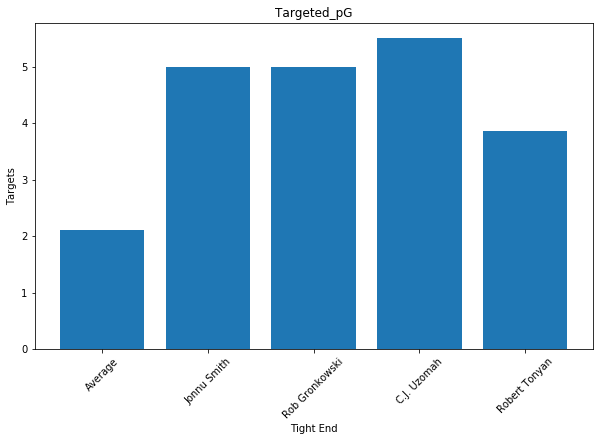

In [71]:
average, te_1, _1te = print_metric(available_te, 'Targeted_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Targeted_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Targeted_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

Avg Receptions_pG: 1.45
Jonnu Smith Receptions_pG: 3.14
--------------------------------------------------
Avg Receptions_pG: 1.45
Rob Gronkowski Receptions_pG: 3.25
--------------------------------------------------
Avg Receptions_pG: 1.45
C.J. Uzomah Receptions_pG: 4.0
--------------------------------------------------
Avg Receptions_pG: 1.45
Robert Tonyan Receptions_pG: 3.29
--------------------------------------------------


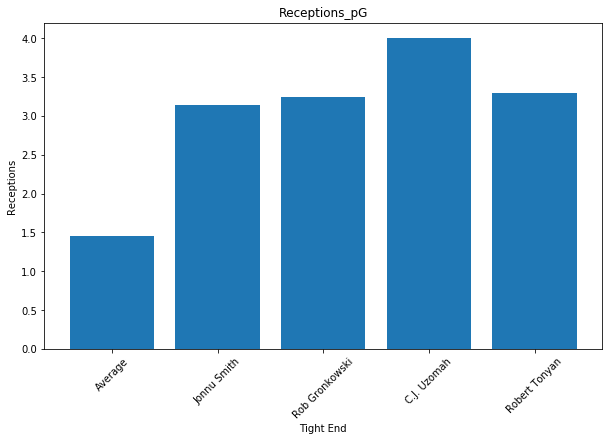

In [72]:
average, te_1, _1te = print_metric(available_te, 'Receptions_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Receptions_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Receptions_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Receptions')

Avg ReceivingYds_pG: 15.24
Jonnu Smith ReceivingYds_pG: 38.86
--------------------------------------------------
Avg ReceivingYds_pG: 15.24
Rob Gronkowski ReceivingYds_pG: 40.12
--------------------------------------------------
Avg ReceivingYds_pG: 15.24
C.J. Uzomah ReceivingYds_pG: 43.5
--------------------------------------------------
Avg ReceivingYds_pG: 15.24
Robert Tonyan ReceivingYds_pG: 44.14
--------------------------------------------------


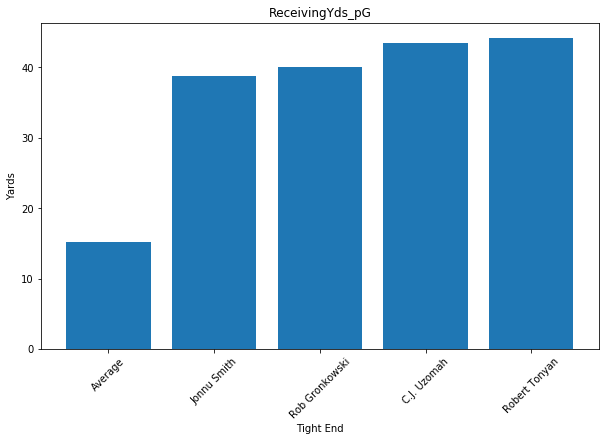

In [73]:
average, te_1, _1te = print_metric(available_te, 'ReceivingYds_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingYds_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingYds_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Yards')

Avg ReceivingTDs_pG: 0.15
Jonnu Smith ReceivingTDs_pG: 0.71
--------------------------------------------------
Avg ReceivingTDs_pG: 0.15
Rob Gronkowski ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.15
C.J. Uzomah ReceivingTDs_pG: 0.5
--------------------------------------------------
Avg ReceivingTDs_pG: 0.15
Robert Tonyan ReceivingTDs_pG: 0.71
--------------------------------------------------


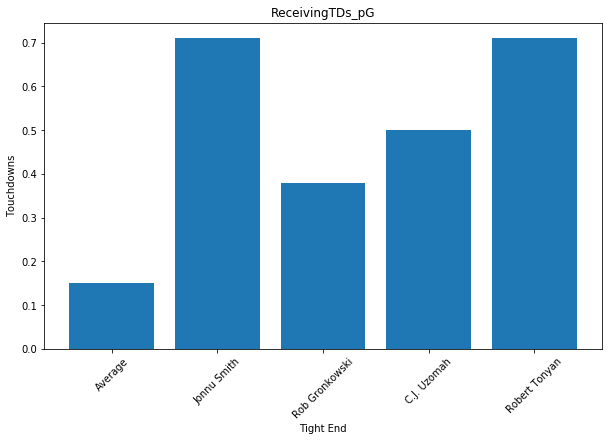

In [74]:
average, te_1, _1te = print_metric(available_te, 'ReceivingTDs_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingTDs_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingTDs_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingTDs_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingTDs_pG', 'Tight End', 'Touchdowns')

In [75]:
te_opp = {'Tennessee Titans': 'Chicago Bears',
          'Tampa Bay Buccaneers': 'New Orleans Saints',
          'Green Bay Packers': 'San Francisco 49ers'
          }

In [76]:
defense[defense['Team'].isin(te_opp.values())]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG
9,Chicago Bears,8,166,533,5.20,2788,223,960,4.30,6,293,5.90,179,10.80,1828,8,30,12,40.00,9,5,4,17,48.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,20.75,348.50,27.88,120.00,36.62,22.38,0.61,228.50,1.00,2.12,6.00
11,San Francisco 49ers,8,173,484,5.20,2517,210,845,4.00,5,260,6.10,165,10.60,1672,12,19,11,57.90,10,8,2,14,43.00,4.00,5.00,12.00,6.00,-2.00,3.00,17.00,-2.00,21.62,314.62,26.25,105.62,32.50,20.62,0.63,209.00,1.50,1.75,5.38
17,New Orleans Saints,7,197,437,5.30,2299,178,634,3.60,5,240,6.40,160,11.30,1665,19,24,20,83.30,6,4,2,19,31.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,28.14,328.43,25.43,90.57,34.29,22.86,0.67,237.86,2.71,2.71,4.43


In [77]:
teamTE1 = 9
teamTE2 = 17
teamTE3 = 11

Avg Passing_Att_pG: 34.92
Chicago Bears Passing_Att_pG: 36.62
--------------------------------------------------
Avg Passing_Att_pG: 34.92
New Orleans Saints Passing_Att_pG: 34.29
--------------------------------------------------
Avg Passing_Att_pG: 34.92
San Francisco 49ers Passing_Att_pG: 32.5
--------------------------------------------------


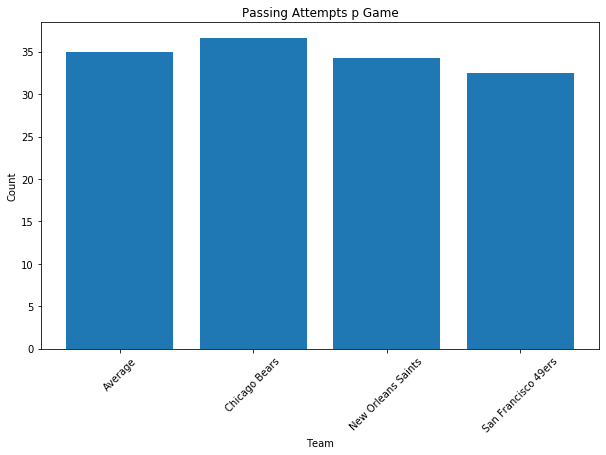

In [79]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Att_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Att_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Att_pG', teamTE3)

x = ['Average', te_team1, te_team2, te_team3]
y = [average, te_def1, te_def2, te_def3]

bar_plot(x, y, 'Passing Attempts p Game', 'Team', 'Count')

Avg Completions_pG: 22.89
Chicago Bears Completions_pG: 22.38
--------------------------------------------------
Avg Completions_pG: 22.89
New Orleans Saints Completions_pG: 22.86
--------------------------------------------------
Avg Completions_pG: 22.89
San Francisco 49ers Completions_pG: 20.62
--------------------------------------------------


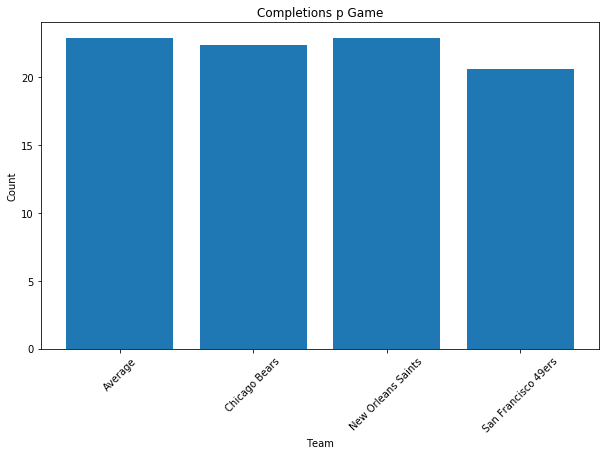

In [80]:
average, te_team1, te_def1 = print_metric_team(defense, 'Completions_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Completions_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Completions_pG', teamTE3)

x = ['Average', te_team1, te_team2, te_team3]
y = [average, te_def1, te_def2, te_def3]

bar_plot(x, y, 'Completions p Game', 'Team', 'Count')

Avg Passing_Yds_pG: 240.93
Chicago Bears Passing_Yds_pG: 228.5
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
New Orleans Saints Passing_Yds_pG: 237.86
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
San Francisco 49ers Passing_Yds_pG: 209.0
--------------------------------------------------


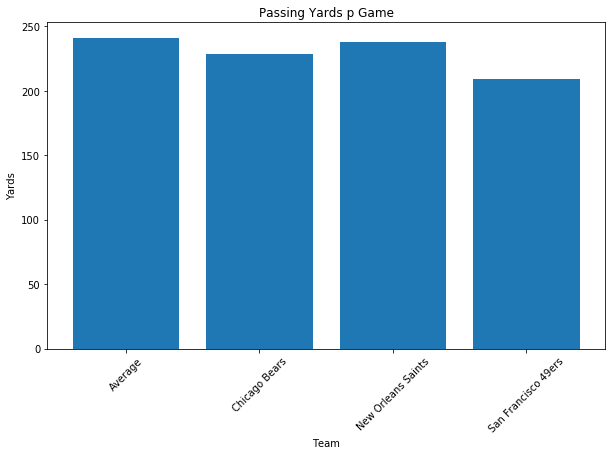

In [81]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamTE3)

x = ['Average', te_team1, te_team2, te_team3]
y = [average, te_def1, te_def2, te_def3]

bar_plot(x, y, 'Passing Yards p Game', 'Team', 'Yards')

Avg Passing_TDs_pG: 1.74
Chicago Bears Passing_TDs_pG: 1.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
New Orleans Saints Passing_TDs_pG: 2.71
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
San Francisco 49ers Passing_TDs_pG: 1.5
--------------------------------------------------


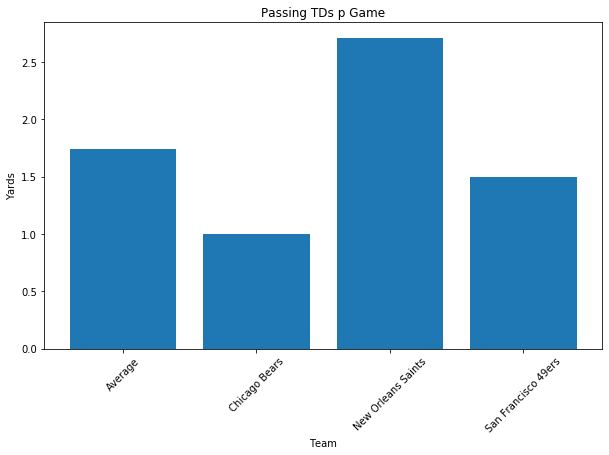

In [82]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamTE3)

x = ['Average', te_team1, te_team2, te_team3]
y = [average, te_def1, te_def2, te_def3]

bar_plot(x, y, 'Passing TDs p Game', 'Team', 'Yards')

Without a doubt, even with a slow start and Antonio Brown coming in to play, Gronk remains as my tight end. New Orleans has given up more attempts, completions, yards and touchdowns compared to the other defenses my tight ends are going up against. Jonnu Smith has stalled and Tonyan while a reliable target for Rodgers is going up against a 49ers defense that simply has not allowed a ton of yards and points through the air.

## Wide Receiver

In [96]:
wrs = offense[offense['Position'] == 'WR']

In [97]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')
per_week_stats(wrs, 'LostFumbles', 'Games')

In [98]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
21,DeAndre Hopkins,ARI,WR,28,7,7,0,0,0,0,0,0,0,0.00,0,73,57,704,15.50,3,1,1,3,0,0,114.90,9,22,86.40,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,10.43,8.14,0.78,100.57,0.43,0.14
27,Tyler Boyd,CIN,WR,26,8,5,1,1,16,0,0,4,38,14.00,0,68,54,584,18.10,3,1,0,3,0,0,107.80,11,28,80.80,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,8.50,6.75,0.79,73.00,0.38,0.00
38,Robby Anderson,CAR,WR,27,8,8,0,0,0,0,0,1,3,3.00,0,67,51,688,17.90,1,1,1,1,1,0,100.60,17,39,75.20,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,8.38,6.38,0.76,86.00,0.12,0.12
49,Julio Jones,ATL,WR,31,6,6,0,0,0,0,0,0,0,0.00,0,49,38,584,18.70,2,0,0,2,0,0,89.40,20,50,70.40,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,8.17,6.33,0.78,97.33,0.33,0.00
121,Jamison Crowder,NYJ,WR,27,4,4,0,0,0,0,0,0,0,0.00,0,46,29,383,15.10,2,0,0,2,0,0,64.80,41,,50.30,17.50,0.00,0.00,10.40,17.60,4.80,0.00,0.00,11.50,7.25,0.63,95.75,0.50,0.00
159,Diontae Johnson,PIT,WR,24,6,6,0,0,0,0,0,1,9,9.00,0,44,25,233,12.20,3,1,1,3,0,0,52.70,64,,40.20,3.70,15.20,0.90,0.00,0.20,0.00,20.00,0.60,7.33,4.17,0.57,38.83,0.50,0.17


In [99]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
available_wrs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
21,DeAndre Hopkins,ARI,WR,28,7,7,0,0,0,0,0,0,0,0.00,0,73,57,704,15.50,3,1,1,3,0,0,114.90,9,22,86.40,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,10.43,8.14,0.78,100.57,0.43,0.14
27,Tyler Boyd,CIN,WR,26,8,5,1,1,16,0,0,4,38,14.00,0,68,54,584,18.10,3,1,0,3,0,0,107.80,11,28,80.80,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,8.50,6.75,0.79,73.00,0.38,0.00
38,Robby Anderson,CAR,WR,27,8,8,0,0,0,0,0,1,3,3.00,0,67,51,688,17.90,1,1,1,1,1,0,100.60,17,39,75.20,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,8.38,6.38,0.76,86.00,0.12,0.12
49,Julio Jones,ATL,WR,31,6,6,0,0,0,0,0,0,0,0.00,0,49,38,584,18.70,2,0,0,2,0,0,89.40,20,50,70.40,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,8.17,6.33,0.78,97.33,0.33,0.00
54,Tee Higgins,CIN,WR,21,8,6,0,0,0,0,0,5,28,11.00,0,52,33,488,21.90,3,0,0,3,0,0,86.10,22,55,69.60,0.00,3.50,16.00,9.00,6.20,12.70,13.80,8.40,6.50,4.12,0.63,61.00,0.38,0.00


In [100]:
available_wrs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6',
       'Week_7', 'Week_8', 'Targeted_pG', 'Receptions_pG', 'Catch_Rate',
       'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG'],
      dtype='object')

In [101]:
scaled_wrs = available_wrs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'Targeted_pG', 'Receptions_pG', 
                            'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

wr_columns = ['Targeted_pG', 'Receptions_pG', 'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_wrs, wr_columns)

scaled_wrs.head()

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
21,DeAndre Hopkins,ARI,WR,7,7,3.06,3.71,0.62,3.41,1.73,1.27
27,Tyler Boyd,CIN,WR,8,5,2.24,2.85,0.70,2.14,1.42,-0.20
38,Robby Anderson,CAR,WR,8,8,2.18,2.62,0.51,2.74,-0.04,1.09
49,Julio Jones,ATL,WR,6,6,2.10,2.60,0.59,3.26,1.17,-0.20
54,Tee Higgins,CIN,WR,8,6,1.39,1.24,-0.20,1.59,1.42,-0.20


In [102]:
scaled_wrs['Combined_Score'] = (scaled_wrs['Targeted_pG'] + scaled_wrs['Receptions_pG'] + 
                                scaled_wrs['Catch_Rate'] + scaled_wrs['ReceivingYds_pG'] + 
                                scaled_wrs['ReceivingTDs_pG'] - scaled_wrs['LostFumbles_pG'])

scaled_wrs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_wrs.head(10)

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
121,Jamison Crowder,NYJ,WR,4,4,3.51,3.16,-0.23,3.19,2.15,-0.20,11.98
21,DeAndre Hopkins,ARI,WR,7,7,3.06,3.71,0.62,3.41,1.73,1.27,11.25
49,Julio Jones,ATL,WR,6,6,2.10,2.60,0.59,3.26,1.17,-0.20,9.92
110,Corey Davis,TEN,WR,5,5,1.94,2.27,0.41,2.18,2.73,-0.20,9.73
27,Tyler Boyd,CIN,WR,8,5,2.24,2.85,0.70,2.14,1.42,-0.20,9.55
162,Allen Lazard,GNB,WR,3,3,1.04,1.37,0.53,2.68,3.12,-0.20,8.93
153,Emmanuel Sanders,NOR,WR,5,2,1.69,1.90,0.29,1.58,1.56,-0.20,7.23
38,Robby Anderson,CAR,WR,8,8,2.18,2.62,0.51,2.74,-0.04,1.09,6.93
98,Cole Beasley,BUF,WR,8,4,1.34,1.85,0.75,1.63,0.69,-0.20,6.46
205,Sterling Shepard,NYG,WR,4,4,1.60,2.08,0.65,1.19,0.69,-0.20,6.42


In [103]:
wr1 = 121
wr2 = 21
wr3 = 49
wr4 = 110
wr5 = 162
wr6 = 38
wr7 = 98
wr8 = 205

Avg Targeted_pG: 3.22
Jamison Crowder Targeted_pG: 11.5
--------------------------------------------------
Avg Targeted_pG: 3.22
DeAndre Hopkins Targeted_pG: 10.43
--------------------------------------------------
Avg Targeted_pG: 3.22
Julio Jones Targeted_pG: 8.17
--------------------------------------------------
Avg Targeted_pG: 3.22
Corey Davis Targeted_pG: 7.8
--------------------------------------------------
Avg Targeted_pG: 3.22
Allen Lazard Targeted_pG: 5.67
--------------------------------------------------
Avg Targeted_pG: 3.22
Robby Anderson Targeted_pG: 8.38
--------------------------------------------------
Avg Targeted_pG: 3.22
Cole Beasley Targeted_pG: 6.38
--------------------------------------------------
Avg Targeted_pG: 3.22
Sterling Shepard Targeted_pG: 7.0
--------------------------------------------------


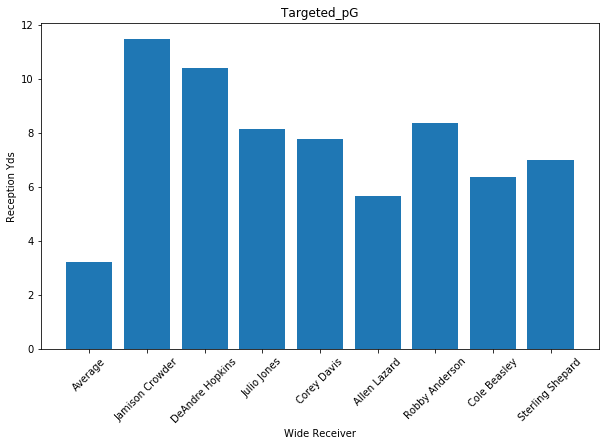

In [104]:
average, wr_1, _1wr = print_metric(available_wrs, 'Targeted_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Targeted_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Targeted_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Targeted_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Targeted_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Targeted_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Targeted_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Targeted_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

Avg Receptions_pG: 2.1
Jamison Crowder Receptions_pG: 7.25
--------------------------------------------------
Avg Receptions_pG: 2.1
DeAndre Hopkins Receptions_pG: 8.14
--------------------------------------------------
Avg Receptions_pG: 2.1
Julio Jones Receptions_pG: 6.33
--------------------------------------------------
Avg Receptions_pG: 2.1
Corey Davis Receptions_pG: 5.8
--------------------------------------------------
Avg Receptions_pG: 2.1
Allen Lazard Receptions_pG: 4.33
--------------------------------------------------
Avg Receptions_pG: 2.1
Robby Anderson Receptions_pG: 6.38
--------------------------------------------------
Avg Receptions_pG: 2.1
Cole Beasley Receptions_pG: 5.12
--------------------------------------------------
Avg Receptions_pG: 2.1
Sterling Shepard Receptions_pG: 5.5
--------------------------------------------------


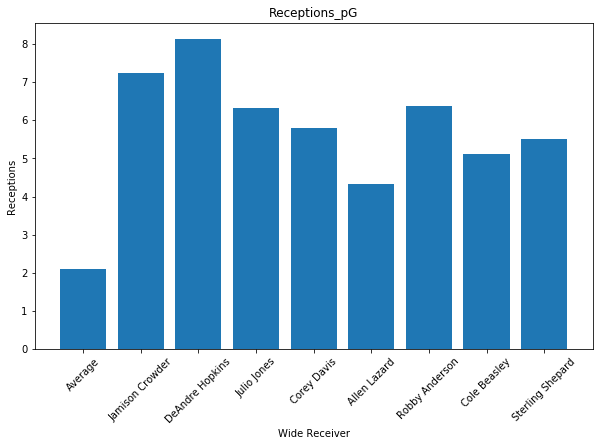

In [105]:
average, wr_1, _1wr = print_metric(available_wrs, 'Receptions_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Receptions_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Receptions_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Receptions_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Receptions_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Receptions_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Receptions_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Receptions_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Receptions')

Avg Catch_Rate: 0.67
Jamison Crowder Catch_Rate: 0.63
--------------------------------------------------
Avg Catch_Rate: 0.67
DeAndre Hopkins Catch_Rate: 0.78
--------------------------------------------------
Avg Catch_Rate: 0.67
Julio Jones Catch_Rate: 0.78
--------------------------------------------------
Avg Catch_Rate: 0.67
Corey Davis Catch_Rate: 0.74
--------------------------------------------------
Avg Catch_Rate: 0.67
Allen Lazard Catch_Rate: 0.76
--------------------------------------------------
Avg Catch_Rate: 0.67
Robby Anderson Catch_Rate: 0.76
--------------------------------------------------
Avg Catch_Rate: 0.67
Cole Beasley Catch_Rate: 0.8
--------------------------------------------------
Avg Catch_Rate: 0.67
Sterling Shepard Catch_Rate: 0.79
--------------------------------------------------


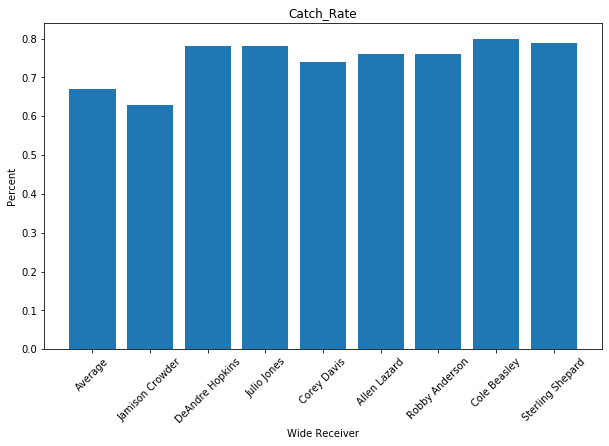

In [106]:
average, wr_1, _1wr = print_metric(available_wrs, 'Catch_Rate', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Catch_Rate', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Catch_Rate', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Catch_Rate', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Catch_Rate', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Catch_Rate', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Catch_Rate', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Catch_Rate', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Percent')

Avg ReceivingYds_pG: 26.25
Jamison Crowder ReceivingYds_pG: 95.75
--------------------------------------------------
Avg ReceivingYds_pG: 26.25
DeAndre Hopkins ReceivingYds_pG: 100.57
--------------------------------------------------
Avg ReceivingYds_pG: 26.25
Julio Jones ReceivingYds_pG: 97.33
--------------------------------------------------
Avg ReceivingYds_pG: 26.25
Corey Davis ReceivingYds_pG: 73.8
--------------------------------------------------
Avg ReceivingYds_pG: 26.25
Allen Lazard ReceivingYds_pG: 84.67
--------------------------------------------------
Avg ReceivingYds_pG: 26.25
Robby Anderson ReceivingYds_pG: 86.0
--------------------------------------------------
Avg ReceivingYds_pG: 26.25
Cole Beasley ReceivingYds_pG: 61.75
--------------------------------------------------
Avg ReceivingYds_pG: 26.25
Sterling Shepard ReceivingYds_pG: 52.25
--------------------------------------------------


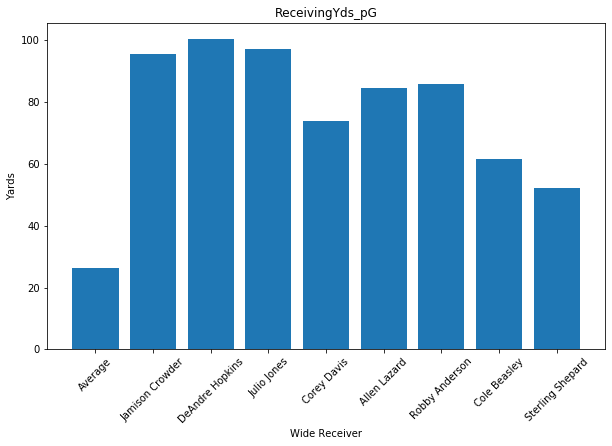

In [107]:
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingYds_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingYds_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingYds_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingYds_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Yards')

Avg ReceivingTDs_pG: 0.13
Jamison Crowder ReceivingTDs_pG: 0.5
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
DeAndre Hopkins ReceivingTDs_pG: 0.43
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Julio Jones ReceivingTDs_pG: 0.33
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Corey Davis ReceivingTDs_pG: 0.6
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Allen Lazard ReceivingTDs_pG: 0.67
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Robby Anderson ReceivingTDs_pG: 0.12
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Cole Beasley ReceivingTDs_pG: 0.25
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Sterling Shepard ReceivingTDs_pG: 0.25
--------------------------------------------------


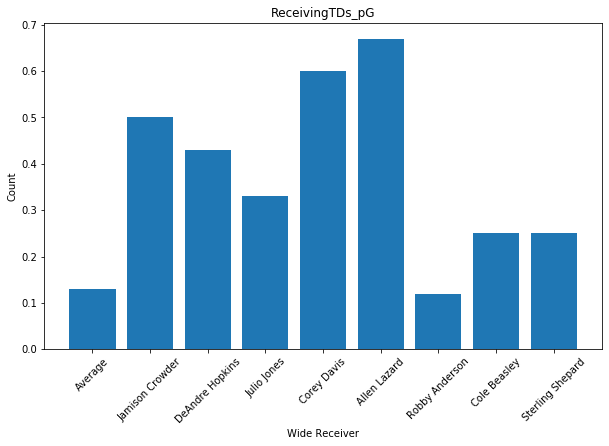

In [108]:
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingTDs_pG', 'Wide Receiver', 'Count')

In [109]:
wr_opp = ['New England Patriots', 'Miami Dolphins', 'Denver Broncos', 'Chicago Bears', 'San Francisco 49ers', 
          'Kansas City Chiefs', 'Seattle Seahawks', 'Washington Football Team']

In [110]:
defense[defense['Team'].isin(list(wr_opp))]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG
0,Miami Dolphins,7,130,467,5.60,2632,178,876,4.90,9,270,6.10,165,11.60,1756,8,22,15,68.20,13,7,6,19,63.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,18.57,376.00,25.43,125.14,38.57,23.57,0.61,250.86,1.14,2.71,9.00
5,Kansas City Chiefs,8,152,513,5.40,2752,238,1142,4.80,7,258,5.90,155,11.00,1610,9,20,14,70.00,14,9,5,17,66.00,7.00,5.00,7.00,20.00,-1.00,3.00,18.00,7.00,19.00,344.00,29.75,142.75,32.25,19.38,0.60,201.25,1.12,2.12,8.25
8,Washington Football Team,7,165,424,5.10,2164,205,863,4.20,8,197,5.90,125,11.60,1301,10,21,11,52.40,9,8,1,22,47.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,23.57,309.14,29.29,123.29,28.14,17.86,0.63,185.86,1.43,3.14,6.71
9,Chicago Bears,8,166,533,5.20,2788,223,960,4.30,6,293,5.90,179,10.80,1828,8,30,12,40.00,9,5,4,17,48.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,20.75,348.50,27.88,120.00,36.62,22.38,0.61,228.50,1.00,2.12,6.00
10,New England Patriots,7,167,412,6.10,2501,216,983,4.60,8,186,7.70,125,12.80,1518,9,23,14,60.90,13,9,4,10,50.00,11.00,6.00,15.00,4.00,0.00,7.00,4.00,3.00,23.86,357.29,30.86,140.43,26.57,17.86,0.67,216.86,1.29,1.43,7.14
11,San Francisco 49ers,8,173,484,5.20,2517,210,845,4.00,5,260,6.10,165,10.60,1672,12,19,11,57.90,10,8,2,14,43.00,4.00,5.00,12.00,6.00,-2.00,3.00,17.00,-2.00,21.62,314.62,26.25,105.62,32.50,20.62,0.63,209.00,1.50,1.75,5.38
12,Denver Broncos,7,183,472,5.30,2520,190,864,4.50,5,262,5.90,173,10.30,1656,11,25,12,48.00,8,5,3,20,35.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,26.14,360.00,27.14,123.43,37.43,24.71,0.66,236.57,1.57,2.86,5.00
19,Seattle Seahawks,7,199,525,6.10,3226,185,715,3.90,9,328,7.40,223,11.50,2511,13,26,18,69.20,14,9,5,12,37.00,6.00,3.00,9.00,5.00,7.00,0.00,0.00,7.00,28.43,460.86,26.43,102.14,46.86,31.86,0.68,358.71,1.86,1.71,5.29


In [111]:
teamWR1 = 10
teamWR2 = 0
teamWR3 = 12
teamWR4 = 9
teamWR5 = 11
teamWR6 = 5
teamWR7 = 19
teamWR8 = 8

Avg Ttl_Pts_Allowed_pG: 25.22
New England Patriots Ttl_Pts_Allowed_pG: 23.86
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.22
Miami Dolphins Ttl_Pts_Allowed_pG: 18.57
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.22
Denver Broncos Ttl_Pts_Allowed_pG: 26.14
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.22
Chicago Bears Ttl_Pts_Allowed_pG: 20.75
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.22
San Francisco 49ers Ttl_Pts_Allowed_pG: 21.62
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.22
Kansas City Chiefs Ttl_Pts_Allowed_pG: 19.0
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.22
Seattle Seahawks Ttl_Pts_Allowed_pG: 28.43
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.22
Washington Football Team Ttl_Pts_Allowed_pG: 23.57
--------------------------------------------------

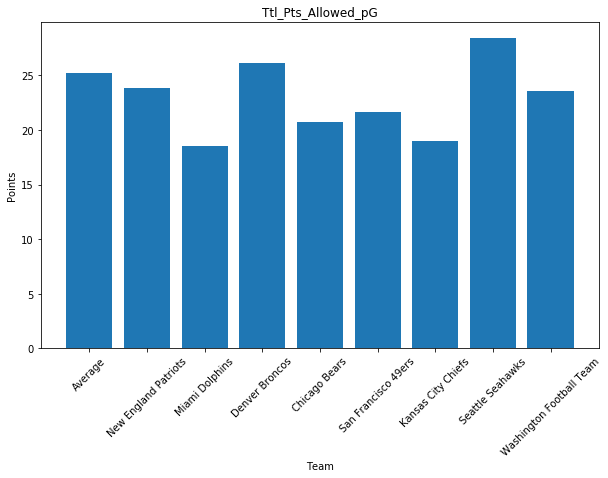

In [112]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Passing_TDs_pG: 1.74
New England Patriots Passing_TDs_pG: 1.29
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
Miami Dolphins Passing_TDs_pG: 1.14
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
Denver Broncos Passing_TDs_pG: 1.57
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
Chicago Bears Passing_TDs_pG: 1.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
San Francisco 49ers Passing_TDs_pG: 1.5
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
Kansas City Chiefs Passing_TDs_pG: 1.12
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
Seattle Seahawks Passing_TDs_pG: 1.86
--------------------------------------------------
Avg Passing_TDs_pG: 1.74
Washington Football Team Passing_TDs_pG: 1.43
--------------------------------------------------


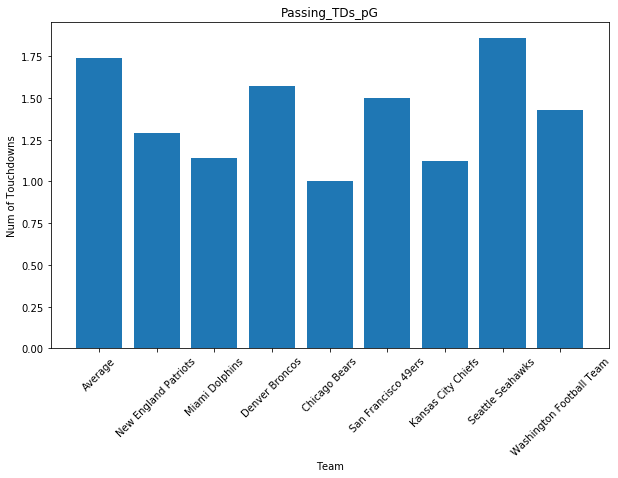

In [113]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_TDs_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_TDs_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_TDs_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_TDs_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Avg Passing_Att_pG: 34.92
New England Patriots Passing_Att_pG: 26.57
--------------------------------------------------
Avg Passing_Att_pG: 34.92
Miami Dolphins Passing_Att_pG: 38.57
--------------------------------------------------
Avg Passing_Att_pG: 34.92
Denver Broncos Passing_Att_pG: 37.43
--------------------------------------------------
Avg Passing_Att_pG: 34.92
Chicago Bears Passing_Att_pG: 36.62
--------------------------------------------------
Avg Passing_Att_pG: 34.92
San Francisco 49ers Passing_Att_pG: 32.5
--------------------------------------------------
Avg Passing_Att_pG: 34.92
Kansas City Chiefs Passing_Att_pG: 32.25
--------------------------------------------------
Avg Passing_Att_pG: 34.92
Seattle Seahawks Passing_Att_pG: 46.86
--------------------------------------------------
Avg Passing_Att_pG: 34.92
Washington Football Team Passing_Att_pG: 28.14
--------------------------------------------------


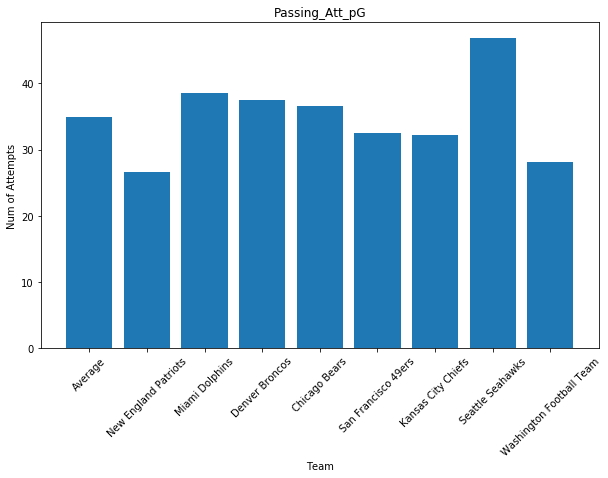

In [114]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Att_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Att_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Att_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Att_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Att_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Att_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Att_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Att_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Att_pG', 'Team', 'Num of Attempts')

Avg Completions_pG: 22.89
New England Patriots Completions_pG: 17.86
--------------------------------------------------
Avg Completions_pG: 22.89
Miami Dolphins Completions_pG: 23.57
--------------------------------------------------
Avg Completions_pG: 22.89
Denver Broncos Completions_pG: 24.71
--------------------------------------------------
Avg Completions_pG: 22.89
Chicago Bears Completions_pG: 22.38
--------------------------------------------------
Avg Completions_pG: 22.89
San Francisco 49ers Completions_pG: 20.62
--------------------------------------------------
Avg Completions_pG: 22.89
Kansas City Chiefs Completions_pG: 19.38
--------------------------------------------------
Avg Completions_pG: 22.89
Seattle Seahawks Completions_pG: 31.86
--------------------------------------------------
Avg Completions_pG: 22.89
Washington Football Team Completions_pG: 17.86
--------------------------------------------------


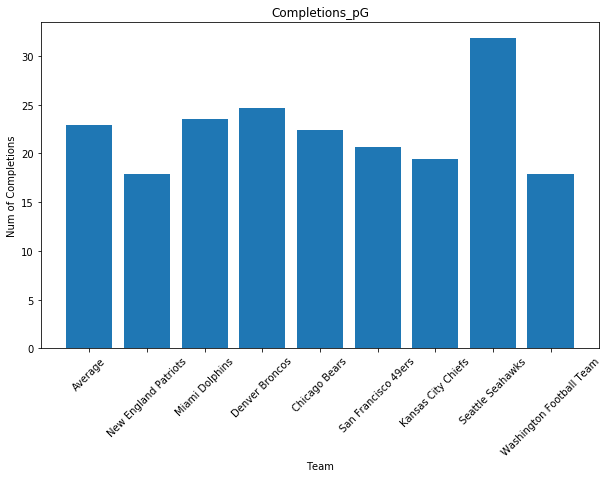

In [115]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Completions_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completions_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completions_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completions_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completions_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completions_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completions_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completions_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completions_pG', 'Team', 'Num of Completions')

Avg Completion_Percent_Allowed: 0.66
New England Patriots Completion_Percent_Allowed: 0.67
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Miami Dolphins Completion_Percent_Allowed: 0.61
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Denver Broncos Completion_Percent_Allowed: 0.66
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Chicago Bears Completion_Percent_Allowed: 0.61
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
San Francisco 49ers Completion_Percent_Allowed: 0.63
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Kansas City Chiefs Completion_Percent_Allowed: 0.6
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Seattle Seahawks Completion_Percent_Allowed: 0.68
--------------------------------------------------
Avg Completion_Percent_Allowed: 0

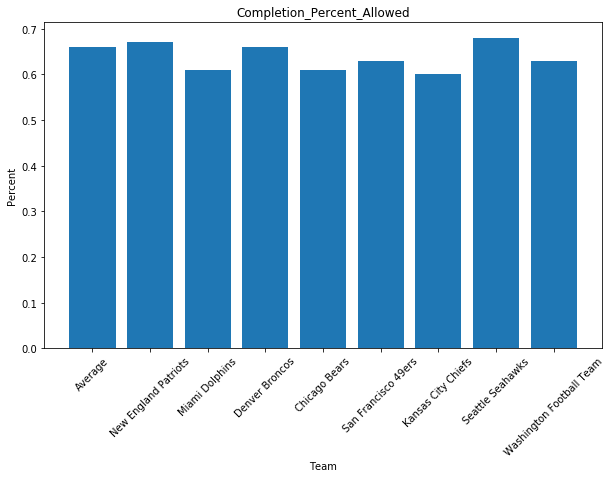

In [116]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completion_Percent_Allowed', 'Team', 'Percent')

Avg Passing_Yds_pG: 240.93
New England Patriots Passing_Yds_pG: 216.86
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
Miami Dolphins Passing_Yds_pG: 250.86
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
Denver Broncos Passing_Yds_pG: 236.57
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
Chicago Bears Passing_Yds_pG: 228.5
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
San Francisco 49ers Passing_Yds_pG: 209.0
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
Kansas City Chiefs Passing_Yds_pG: 201.25
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
Seattle Seahawks Passing_Yds_pG: 358.71
--------------------------------------------------
Avg Passing_Yds_pG: 240.93
Washington Football Team Passing_Yds_pG: 185.86
--------------------------------------------------


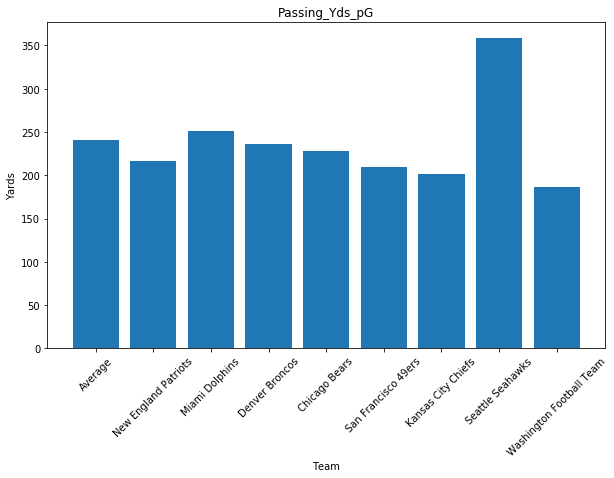

In [117]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Yds_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Yds_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Yds_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Yds_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Crowder hasn't played a game in a minute. If he's healthy, he's a big part of the Jets offense, but with him not playing, I feel like I need to move on. Who stands out is Cole Beasley. He's going up against the Seahawks who have allowed 350 passing yards, more than any other competitors going up this week. DeAndre Hopkins is facing the Miami Dolphins who have allowed the second most in terms of passing yards. Julio Jones is going head to head with the Denver Broncos who 26 points per game, the second highest amoutn behind the Seahawks.


## Defense

In [128]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [129]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
2TM,0,0,0,0,0,37,177,0,9,7,76,0,1,0,0,28.80
ARI,169,253,1847,13,7,216,1125,12,236,169,1847,13,8,2,25,646.60
ATL,211,317,2462,12,4,227,867,10,307,211,2462,12,6,2,22,712.90
BAL,116,192,1352,12,5,228,1251,8,184,117,1367,12,10,4,21,536.40
BUF,189,282,2194,16,5,210,869,7,272,189,2194,16,7,6,23,673.60


In [130]:
ttl_offense.reset_index(inplace=True)

In [131]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [132]:
ttl_offense.columns

Index(['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds',
       'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'ReceivingTDs',
       'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts', 'Long_Name'],
      dtype='object')

In [133]:
num_games = defense[['Team', 'GP']]
num_games

,Team,GP
0,Miami Dolphins,7
1,Baltimore Ravens,7
2,Indianapolis Colts,7
3,Pittsburgh Steelers,7
4,Arizona Cardinals,7
5,Kansas City Chiefs,8
6,Los Angeles Rams,8
7,Tampa Bay Buccaneers,8
8,Washington Football Team,7
9,Chicago Bears,8


In [134]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
0,ARI,Arizona Cardinals,7,169,253,1847,13,7,216,1125,12,236,169,1847,13,8,2,25,646.60
1,ATL,Atlanta Falcons,8,211,317,2462,12,4,227,867,10,307,211,2462,12,6,2,22,712.90
2,BAL,Baltimore Ravens,7,116,192,1352,12,5,228,1251,8,184,117,1367,12,10,4,21,536.40
3,BUF,Buffalo Bills,8,189,282,2194,16,5,210,869,7,272,189,2194,16,7,6,23,673.60
4,CAR,Carolina Panthers,8,185,261,2109,9,6,198,854,9,251,185,2109,9,4,3,18,609.10
5,CHI,Chicago Bears,8,202,319,1971,14,10,180,685,2,311,201,1967,14,6,0,16,588.50
6,CIN,Cincinnati Bengals,8,222,331,2288,11,5,217,810,9,321,222,2288,11,11,5,20,661.30
7,CLE,Cleveland Browns,8,145,236,1634,16,7,237,1202,8,221,145,1634,16,5,2,24,620.40
8,DAL,Dallas Cowboys,8,227,351,2538,11,7,212,843,9,342,227,2538,11,16,11,20,696.10
9,DEN,Denver Broncos,7,145,247,1654,9,11,183,790,6,236,145,1654,9,11,4,15,494.10


In [135]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [136]:
taken_def = ['Baltimore Ravens', 'Buffalo Bills', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams',
             'New Orleans Saints', 'New York Giants', 'Pittsburgh Steelers', 'San Francisco 49ers', 
             'Tampa Bay Buccaneers']

In [137]:
taken_off = ['Indianapolis Colts', 'Seattle Seahawks', 'Baltimore Ravens', 'Carolina Panthers', 
             'Tampa Bay Buccaneers', 'Washington Football Team', 'Dallas Cowboys', 'Green Bay Packers', 
             'New Orleans Saints']

In [144]:
available_def = defense[~defense['Team'].isin(taken_def)]

In [145]:
available_def

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG,Ttl_Turnovers_pG
0,Miami Dolphins,7,130,467,5.60,2632,178,876,4.90,9,270,6.10,165,11.60,1756,8,22,15,68.20,13,7,6,19,63.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,18.57,376.00,25.43,125.14,38.57,23.57,0.61,250.86,1.14,2.71,9.00,1.86
4,Arizona Cardinals,7,146,485,5.50,2649,195,918,4.70,4,271,6.00,171,11.00,1731,12,27,12,44.40,10,6,4,19,47.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,20.86,378.43,27.86,131.14,38.71,24.43,0.63,247.29,1.71,2.71,6.71,1.43
8,Washington Football Team,7,165,424,5.10,2164,205,863,4.20,8,197,5.90,125,11.60,1301,10,21,11,52.40,9,8,1,22,47.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,23.57,309.14,29.29,123.29,28.14,17.86,0.63,185.86,1.43,3.14,6.71,1.29
9,Chicago Bears,8,166,533,5.20,2788,223,960,4.30,6,293,5.90,179,10.80,1828,8,30,12,40.00,9,5,4,17,48.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,20.75,348.50,27.88,120.00,36.62,22.38,0.61,228.50,1.00,2.12,6.00,1.12
10,New England Patriots,7,167,412,6.10,2501,216,983,4.60,8,186,7.70,125,12.80,1518,9,23,14,60.90,13,9,4,10,50.00,11.00,6.00,15.00,4.00,0.00,7.00,4.00,3.00,23.86,357.29,30.86,140.43,26.57,17.86,0.67,216.86,1.29,1.43,7.14,1.86
12,Denver Broncos,7,183,472,5.30,2520,190,864,4.50,5,262,5.90,173,10.30,1656,11,25,12,48.00,8,5,3,20,35.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,26.14,360.00,27.14,123.43,37.43,24.71,0.66,236.57,1.57,2.86,5.00,1.14
13,Tennessee Titans,7,184,474,5.90,2778,192,897,4.70,7,275,6.70,183,10.60,1881,17,26,21,80.80,12,9,3,7,26.00,3.00,5.00,7.00,10.00,8.00,-2.00,6.00,-1.00,26.29,396.86,27.43,128.14,39.29,26.14,0.67,268.71,2.43,1.00,3.71,1.71
14,Los Angeles Chargers,7,185,454,5.60,2548,166,786,4.70,5,273,6.10,175,10.50,1762,14,22,12,54.50,6,4,2,15,32.00,11.00,1.00,2.00,4.00,3.00,0.00,8.00,3.00,26.43,364.00,23.71,112.29,39.00,25.00,0.64,251.71,2.00,2.14,4.57,0.86
15,Green Bay Packers,7,187,409,5.90,2426,179,833,4.70,10,214,6.90,153,11.20,1593,12,23,17,73.90,4,2,2,16,30.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,26.71,346.57,25.57,119.00,30.57,21.86,0.71,227.57,1.71,2.29,4.29,0.57
16,Carolina Panthers,8,193,509,5.60,2859,213,999,4.70,12,288,6.30,199,9.60,1860,9,29,17,58.60,11,5,6,8,30.00,-1.00,3.00,11.00,3.00,5.00,2.00,3.00,4.00,24.12,357.38,26.62,124.88,36.00,24.88,0.69,232.50,1.12,1.00,3.75,1.38


In [152]:
scaled_def = available_def[['Team', 'GP', 'Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 
                            'Completions', 'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG',
                            'Ttl_Turnovers_pG']]

def_columns = ['Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 'Completions', 
               'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG', 'Ttl_Turnovers_pG']

scale_data(scaled_def, def_columns)

scaled_def.head()

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG
0,Miami Dolphins,7,-2.25,-0.14,-1.00,-0.12,-0.37,-1.49,-0.07,-1.60,1.03,1.56
4,Arizona Cardinals,7,-1.63,-0.06,-0.06,0.23,-0.12,-0.91,-0.17,-0.45,1.03,0.54
8,Washington Football Team,7,-0.89,-2.19,0.50,-0.22,-1.99,-0.81,-1.85,-1.02,1.62,0.20
9,Chicago Bears,8,-1.66,-0.98,-0.05,-0.41,0.20,-1.50,-0.68,-1.60,0.22,-0.18
10,New England Patriots,7,-0.81,-0.71,1.11,0.77,-1.99,0.29,-1.00,-1.31,-0.73,1.56


In [156]:
scaled_def['Combined_Score'] = (scaled_def['Sacks_pG'] + scaled_def['Ttl_Turnovers_pG'] - 
                                scaled_def['Ttl_Pts_Allowed_pG'] - scaled_def['Ttl_Yds_pG'] -
                                scaled_def['Rushing_Att_pG'] - scaled_def['Rushing_Yds_pG'] - 
                                scaled_def['Completions'] - scaled_def['Completion_Percent_Allowed'] - 
                                scaled_def['Passing_Yds_pG'] - scaled_def['Passing_TDs'])

scaled_def.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_def.head()

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG,Combined_Score
8,Washington Football Team,7,-0.89,-2.19,0.50,-0.22,-1.99,-0.81,-1.85,-1.02,1.62,0.20,10.29
0,Miami Dolphins,7,-2.25,-0.14,-1.00,-0.12,-0.37,-1.49,-0.07,-1.60,1.03,1.56,9.63
9,Chicago Bears,8,-1.66,-0.98,-0.05,-0.41,0.20,-1.50,-0.68,-1.60,0.22,-0.18,6.72
4,Arizona Cardinals,7,-1.63,-0.06,-0.06,0.23,-0.12,-0.91,-0.17,-0.45,1.03,0.54,4.74
10,New England Patriots,7,-0.81,-0.71,1.11,0.77,-1.99,0.29,-1.00,-1.31,-0.73,1.56,4.49


In [140]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,TtlTDs_pG
0,ARI,Arizona Cardinals,7,169,253,1847,13,7,216,1125,12,236,169,1847,13,8,2,25,646.60,24.14,36.14,0.67,263.86,7.30,30.86,160.71,5.21,424.57,3.57
1,ATL,Atlanta Falcons,8,211,317,2462,12,4,227,867,10,307,211,2462,12,6,2,22,712.90,26.38,39.62,0.67,307.75,7.77,28.38,108.38,3.82,416.12,2.75
3,BUF,Buffalo Bills,8,189,282,2194,16,5,210,869,7,272,189,2194,16,7,6,23,673.60,23.62,35.25,0.67,274.25,7.78,26.25,108.62,4.14,382.88,2.88
5,CHI,Chicago Bears,8,202,319,1971,14,10,180,685,2,311,201,1967,14,6,0,16,588.50,25.25,39.88,0.63,246.38,6.18,22.50,85.62,3.81,332.00,2.00
6,CIN,Cincinnati Bengals,8,222,331,2288,11,5,217,810,9,321,222,2288,11,11,5,20,661.30,27.75,41.38,0.67,286.00,6.91,27.12,101.25,3.73,387.25,2.50


In [158]:
def_team1 = 8 # Washington Football Team
def_team2 = 0 # Miami Dolphins
def_team3 = 9 # Chicago Bears
def_team4 = 4 # Arizona Cardinals
def_team5 = 10 # New England Patriots

In [157]:
off_opp = ['NYG', 'ARI', 'TEN', 'MIA', 'NYJ']

In [281]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,TtlTDs_pG
8,DAL,Dallas Cowboys,7,206,311,2358,11,7,178,710,9,304,206,2358,11,14,9,20,651.10,29.43,44.43,0.66,336.86,7.58,25.43,101.43,3.99,438.29,2.86
17,LAR,Los Angeles Rams,7,151,223,1789,12,4,222,972,10,214,151,1789,12,9,4,22,595.20,21.57,31.86,0.68,255.57,8.02,31.71,138.86,4.38,394.43,3.14
21,NOR,New Orleans Saints,6,156,215,1656,11,3,169,713,9,210,156,1656,11,7,2,20,538.10,26.00,35.83,0.73,276.00,7.70,28.17,118.83,4.22,394.83,3.33


In [282]:
off_team1 = 8
off_team2 = 17
off_team3 = 21

Avg Ttl_Yds_pG: 382.41
Philadelphia Eagles Ttl_Yds_pG: 350.86
--------------------------------------------------
Avg Ttl_Yds: 391.37
DAL Ttl_Yds: 438.29
--------------------------------------------------


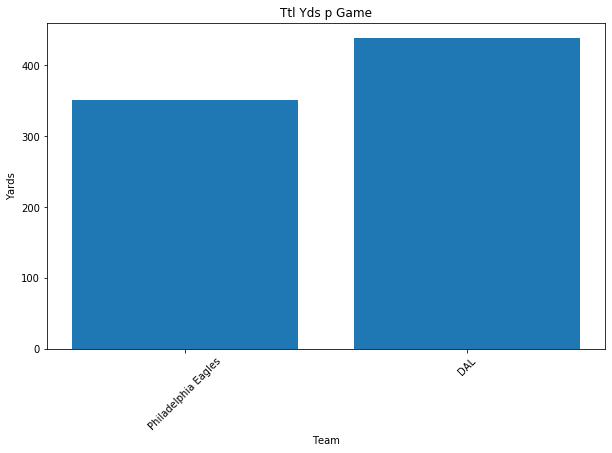

In [284]:
average, philadelphia, eagles = print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
average, miami, dolphins = print_metric_team(available_off, 'Ttl_Yds', off_team1)

x = [philadelphia, dallas]
y = [eagles, cowboys]

bar_plot(x, y, "Ttl Yds p Game", "Team", "Yards")

In [135]:
print(available_def['Team'][def_team1] + ' vs ' + available_off['Long_Name'][off_team1] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team1)
print_metric_team(available_def, 'Sacks', def_team1)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team1)
print('')

print_metric_team(available_def, 'Interceptions', def_team1)
print_metric_team(ttl_offense, 'Interceptions', off_team1)
print('')

print_metric_team(available_def, 'Fumbles', def_team1)
print_metric_team(ttl_offense, 'Fumbles', off_team1)

Chicago Bears vs Carolina Panthers Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Chicago Bears RZ_Percent: 36.8
--------------------------------------------------
Avg Sacks: 10.26
Chicago Bears Sacks: 11
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Chicago Bears Ttl_Yds_pG: 344.0
--------------------------------------------------
Avg Ttl_Yds: 381.73
CAR Ttl_Yds: 409.6
--------------------------------------------------

Avg Interceptions: 3.48
Chicago Bears Interceptions: 3
--------------------------------------------------
Avg Interceptions: 3.81
CAR Interceptions: 3
--------------------------------------------------

Avg Fumbles: 2.0
Chicago Bears Fumbles: 2
--------------------------------------------------
Avg Fumbles: 4.71
CAR Fumbles: 3
--------------------------------------------------


(4.71, 'CAR', 3)

In [136]:
print(available_def['Team'][def_team2] + ' vs ' + available_off['Long_Name'][off_team2] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team2)
print_metric_team(available_def, 'Sacks', def_team2)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team2)
print('')

print_metric_team(available_def, 'Interceptions', def_team2)
print_metric_team(ttl_offense, 'Interceptions', off_team2)
print('')

print_metric_team(available_def, 'Fumbles', def_team2)
print_metric_team(ttl_offense, 'Fumbles', off_team2)

Arizona Cardinals vs Dallas Cowboys Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Arizona Cardinals RZ_Percent: 42.9
--------------------------------------------------
Avg Sacks: 10.26
Arizona Cardinals Sacks: 14
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Arizona Cardinals Ttl_Yds_pG: 346.6
--------------------------------------------------
Avg Ttl_Yds: 381.73
DAL Ttl_Yds: 501.6
--------------------------------------------------

Avg Interceptions: 3.48
Arizona Cardinals Interceptions: 1
--------------------------------------------------
Avg Interceptions: 3.81
DAL Interceptions: 4
--------------------------------------------------

Avg Fumbles: 2.0
Arizona Cardinals Fumbles: 2
--------------------------------------------------
Avg Fumbles: 4.71
DAL Fumbles: 8
--------------------------------------------------


(4.71, 'DAL', 8)

In [137]:
print(available_def['Team'][def_team3] + ' vs ' + available_off['Long_Name'][off_team3] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team3)
print_metric_team(available_def, 'Sacks', def_team3)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team3)
print('')

print_metric_team(available_def, 'Interceptions', def_team3)
print_metric_team(ttl_offense, 'Interceptions', off_team3)
print('')

print_metric_team(available_def, 'Fumbles', def_team3)
print_metric_team(ttl_offense, 'Fumbles', off_team3)

Denver Broncos vs New England Patriots Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Denver Broncos RZ_Percent: 46.2
--------------------------------------------------
Avg Sacks: 10.26
Denver Broncos Sacks: 10
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Denver Broncos Ttl_Yds_pG: 365.25
--------------------------------------------------
Avg Ttl_Yds: 381.73
NWE Ttl_Yds: 405.75
--------------------------------------------------

Avg Interceptions: 3.48
Denver Broncos Interceptions: 1
--------------------------------------------------
Avg Interceptions: 3.81
NWE Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Denver Broncos Fumbles: 1
--------------------------------------------------
Avg Fumbles: 4.71
NWE Fumbles: 3
--------------------------------------------------


(4.71, 'NWE', 3)

In [138]:
print(available_def['Team'][def_team4] + ' vs ' + available_off['Long_Name'][off_team4] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team4)
print_metric_team(available_def, 'Sacks', def_team4)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team4)
print('')

print_metric_team(available_def, 'Interceptions', def_team4)
print_metric_team(ttl_offense, 'Interceptions', off_team4)
print('')

print_metric_team(available_def, 'Fumbles', def_team4)
print_metric_team(ttl_offense, 'Fumbles', off_team4)

Tennessee Titans vs Houston Texans Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Tennessee Titans RZ_Percent: 83.3
--------------------------------------------------
Avg Sacks: 10.26
Tennessee Titans Sacks: 5
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Tennessee Titans Ttl_Yds_pG: 409.25
--------------------------------------------------
Avg Ttl_Yds: 381.73
HOU Ttl_Yds: 374.8
--------------------------------------------------

Avg Interceptions: 3.48
Tennessee Titans Interceptions: 6
--------------------------------------------------
Avg Interceptions: 3.81
HOU Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Tennessee Titans Fumbles: 3
--------------------------------------------------
Avg Fumbles: 4.71
HOU Fumbles: 4
--------------------------------------------------


(4.71, 'HOU', 4)

In [139]:
print(available_def['Team'][def_team5] + ' vs ' + available_off['Long_Name'][off_team5] + ' Summary:')
print('-'*50)
print('')

print_metric_team(available_def, 'RZ_Percent', def_team5)
print_metric_team(available_def, 'Sacks', def_team5)
print('')

print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)
print_metric_team(ttl_offense, 'Ttl_Yds', off_team5)
print('')

print_metric_team(available_def, 'Interceptions', def_team5)
print_metric_team(ttl_offense, 'Interceptions', off_team5)
print('')

print_metric_team(available_def, 'Fumbles', def_team5)
print_metric_team(ttl_offense, 'Fumbles', off_team5)

Washington Football Team vs New York Giants Summary:
--------------------------------------------------

Avg RZ_Percent: 62.24
Washington Football Team RZ_Percent: 64.7
--------------------------------------------------
Avg Sacks: 10.26
Washington Football Team Sacks: 15
--------------------------------------------------

Avg Ttl_Yds_pG: 379.93
Washington Football Team Ttl_Yds_pG: 356.4
--------------------------------------------------
Avg Ttl_Yds: 381.73
NYG Ttl_Yds: 301.2
--------------------------------------------------

Avg Interceptions: 3.48
Washington Football Team Interceptions: 6
--------------------------------------------------
Avg Interceptions: 3.81
NYG Interceptions: 5
--------------------------------------------------

Avg Fumbles: 2.0
Washington Football Team Fumbles: 1
--------------------------------------------------
Avg Fumbles: 4.71
NYG Fumbles: 7
--------------------------------------------------


(4.71, 'NYG', 7)

## Kicking

In [199]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7
0,Randy Bullock,K,CIN,7,19,89.50,55,0-0,3-3,6-7,6-7,2-2,16,100.00,67,77.00,10.00,13.00,12.00,17.00,3.00,12.00,10.00
1,Joey Slye,K,CAR,7,20,85.00,48,0-0,8-8,5-5,4-5,0-2,15,86.70,64,68.00,12.00,5.00,15.00,7.00,11.00,11.00,7.00
5,Younghoe Koo,K,ATL,6,16,93.80,54,0-0,3-3,3-3,7-8,2-2,15,86.70,58,69.00,9.00,17.00,8.00,0.00,13.00,20.00,2.00
6,Jason Sanders,K,MIA,6,15,100.00,52,0-0,5-5,2-2,6-6,2-2,13,100.00,58,68.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00
7,Ryan Succop,K,TB,7,13,84.60,50,0-0,3-3,5-5,2-3,1-2,26,96.20,58,62.00,5.00,7.00,9.00,8.00,14.00,10.00,9.00


In [200]:
available_kickers.rename(columns={'PLAYER': 'Player'}, inplace=True)

In [201]:
available_kickers['FG_1_19'] = available_kickers['_1_19'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_20_29'] = available_kickers['_20_29'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_30_39'] = available_kickers['_30_39'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_40_49'] = available_kickers['_40_49'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_OVER50'] = available_kickers['OVER50'].map(lambda x: int(x.split('-')[0]))

In [202]:
available_kickers.sort_values('OVER50', ascending = False).head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
18,Brandon McManus,K,DEN,6,14,92.90,56,0-0,3-3,0-0,5-5,5-6,10,90.00,48,63.00,2.00,8.00,6.00,18.00,0.00,24.00,5.00,0,3,0,5,5
17,Stephen Gostkowski,K,TEN,6,16,62.50,55,0-0,1-2,3-4,1-5,5-5,20,90.00,48,59.00,4.00,12.00,25.00,0.00,6.00,4.00,8.00,0,1,3,1,5
10,Graham Gano,K,NYG,7,16,93.80,55,0-0,4-4,5-5,2-2,4-5,9,100.00,54,64.00,4.00,7.00,13.00,9.00,20.00,8.00,3.00,0,4,5,2,4
8,Daniel Carlson,K,LV,6,14,92.90,54,0-0,5-5,3-3,2-3,3-3,19,94.70,57,65.00,12.00,12.00,8.00,13.00,11.00,0.00,9.00,0,5,3,2,3
14,Matt Prater,K,DET,6,16,75.00,51,0-0,2-2,5-5,3-4,2-5,16,100.00,52,59.00,12.00,3.00,14.00,3.00,0.00,11.00,16.00,0,2,5,3,2


In [203]:
available_kickers.columns

Index(['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', '_1_19',
       '_20_29', '_30_39', '_40_49', 'OVER50', 'XPM_A', 'XP%', 'PTS', 'TTL',
       'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6', 'Week_7',
       'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50'],
      dtype='object')

In [204]:
scaled_k = available_kickers[['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS',
                              'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']]

columns = ['FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']

for column in columns:
    scaled_k[column] = scaler.fit_transform(scaled_k[[column]])

scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
0,Randy Bullock,K,CIN,7,1.58,0.50,0.72,0.51,0.55,1.48,-0.17,0.66,1.62,1.88,0.65
1,Joey Slye,K,CAR,7,1.75,0.36,0.35,0.38,0.08,1.34,-0.17,3.48,1.13,0.88,-0.82
5,Younghoe Koo,K,ATL,6,1.09,0.63,0.67,0.38,0.08,1.06,-0.17,0.66,0.14,2.38,0.65
6,Jason Sanders,K,MIA,6,0.92,0.82,0.56,0.13,0.55,1.06,-0.17,1.79,-0.35,1.88,0.65
7,Ryan Succop,K,TB,7,0.59,0.35,0.45,1.77,0.41,1.06,-0.17,0.66,1.13,-0.12,-0.09


In [205]:
scaled_k['Combined_Score'] = (scaled_k['FGM_A'] + scaled_k['FG%'] + scaled_k['LNG'] + 
                              scaled_k['XPM_A'] + scaled_k['XP%'] + scaled_k['PTS'] + 
                              scaled_k['FG_1_19'] + scaled_k['FG_20_29'] + scaled_k['FG_30_39'] + 
                              scaled_k['FG_40_49'] + scaled_k['FG_OVER50'])

scaled_k.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50,Combined_Score
9,Tyler Bass,K,BUF,7,1.25,-0.08,0.61,0.89,0.36,0.88,5.74,0.10,0.14,1.38,-0.09,11.19
0,Randy Bullock,K,CIN,7,1.58,0.50,0.72,0.51,0.55,1.48,-0.17,0.66,1.62,1.88,0.65,9.96
1,Joey Slye,K,CAR,7,1.75,0.36,0.35,0.38,0.08,1.34,-0.17,3.48,1.13,0.88,-0.82,8.76
6,Jason Sanders,K,MIA,6,0.92,0.82,0.56,0.13,0.55,1.06,-0.17,1.79,-0.35,1.88,0.65,7.83
10,Graham Gano,K,NYG,7,1.09,0.63,0.72,-0.37,0.55,0.88,-0.17,1.23,1.13,-0.12,2.11,7.65


In [206]:
kicker1 = 18
kicker2 = 9
kicker3 = 0
kicker4 = 1
kicker5 = 6

Avg FGM_A: 9.41
Brandon McManus FGM_A: 14
--------------------------------------------------
Avg FGM_A: 9.41
Tyler Bass FGM_A: 17
--------------------------------------------------
Avg FGM_A: 9.41
Randy Bullock FGM_A: 19
--------------------------------------------------
Avg FGM_A: 9.41
Joey Slye FGM_A: 20
--------------------------------------------------
Avg FGM_A: 9.41
Jason Sanders FGM_A: 15
--------------------------------------------------


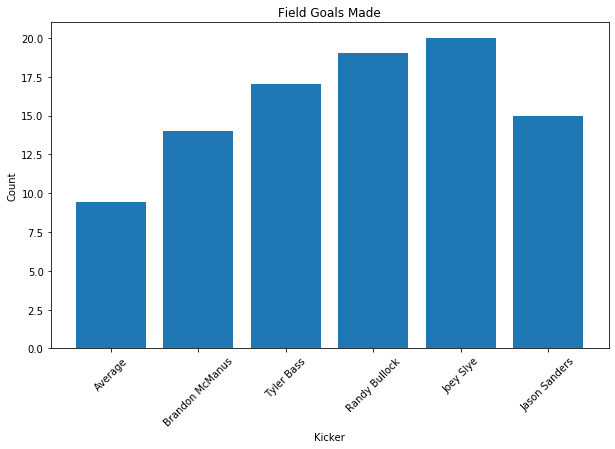

In [209]:
average, mcmanus, brandon = print_metric(available_kickers, 'FGM_A', kicker1)
average, bass, tyler = print_metric(available_kickers, 'FGM_A', kicker2)
average, bullock, randy = print_metric(available_kickers, 'FGM_A', kicker3)
average, slye, joey = print_metric(available_kickers, 'FGM_A', kicker4)
average, sanders, jason = print_metric(available_kickers, 'FGM_A', kicker5)

x = ['Average', mcmanus, bass, bullock, slye, sanders]
y = [average, brandon, tyler, randy, joey, jason]

bar_plot(x, y, 'Field Goals Made', 'Kicker', 'Count')

Avg FG%: 73.19
Brandon McManus FG%: 92.9
--------------------------------------------------
Avg FG%: 73.19
Tyler Bass FG%: 70.6
--------------------------------------------------
Avg FG%: 73.19
Randy Bullock FG%: 89.5
--------------------------------------------------
Avg FG%: 73.19
Joey Slye FG%: 85.0
--------------------------------------------------
Avg FG%: 73.19
Jason Sanders FG%: 100.0
--------------------------------------------------


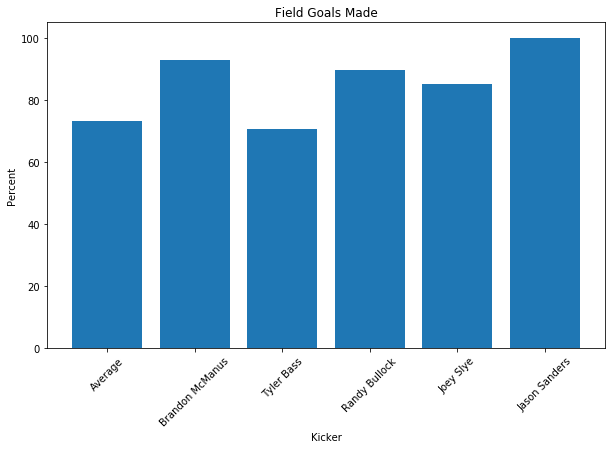

In [210]:
average, mcmanus, brandon = print_metric(available_kickers, 'FG%', kicker1)
average, bass, tyler = print_metric(available_kickers, 'FG%', kicker2)
average, bullock, randy = print_metric(available_kickers, 'FG%', kicker3)
average, slye, joey = print_metric(available_kickers, 'FG%', kicker4)
average, sanders, jason = print_metric(available_kickers, 'FG%', kicker5)

x = ['Average', mcmanus, bass, bullock, slye, sanders]
y = [average, brandon, tyler, randy, joey, jason]

bar_plot(x, y, 'Field Goals Made', 'Kicker', 'Percent')

Avg XPM_A: 11.97
Brandon McManus XPM_A: 10
--------------------------------------------------
Avg XPM_A: 11.97
Tyler Bass XPM_A: 19
--------------------------------------------------
Avg XPM_A: 11.97
Randy Bullock XPM_A: 16
--------------------------------------------------
Avg XPM_A: 11.97
Joey Slye XPM_A: 15
--------------------------------------------------
Avg XPM_A: 11.97
Jason Sanders XPM_A: 13
--------------------------------------------------


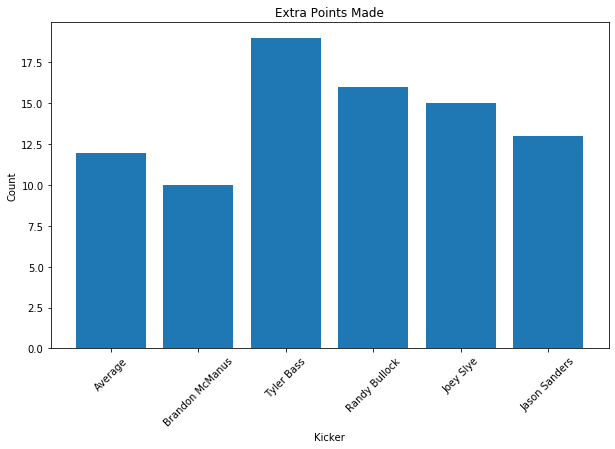

In [211]:
average, mcmanus, brandon = print_metric(available_kickers, 'XPM_A', kicker1)
average, bass, tyler = print_metric(available_kickers, 'XPM_A', kicker2)
average, bullock, randy = print_metric(available_kickers, 'XPM_A', kicker3)
average, slye, joey = print_metric(available_kickers, 'XPM_A', kicker4)
average, sanders, jason = print_metric(available_kickers, 'XPM_A', kicker5)

x = ['Average', mcmanus, bass, bullock, slye, sanders]
y = [average, brandon, tyler, randy, joey, jason]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Count')

Avg XP%: 84.36
Brandon McManus XP%: 90.0
--------------------------------------------------
Avg XP%: 84.36
Tyler Bass XP%: 94.7
--------------------------------------------------
Avg XP%: 84.36
Randy Bullock XP%: 100.0
--------------------------------------------------
Avg XP%: 84.36
Joey Slye XP%: 86.7
--------------------------------------------------
Avg XP%: 84.36
Jason Sanders XP%: 100.0
--------------------------------------------------


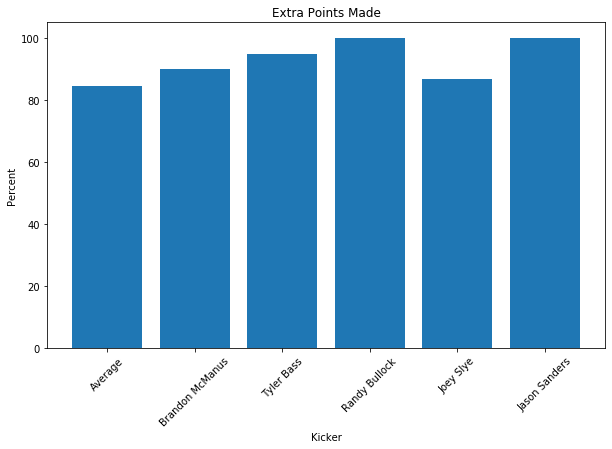

In [212]:
average, mcmanus, brandon = print_metric(available_kickers, 'XP%', kicker1)
average, bass, tyler = print_metric(available_kickers, 'XP%', kicker2)
average, bullock, randy = print_metric(available_kickers, 'XP%', kicker3)
average, slye, joey = print_metric(available_kickers, 'XP%', kicker4)
average, sanders, jason = print_metric(available_kickers, 'XP%', kicker5)

x = ['Average', mcmanus, bass, bullock, slye, sanders]
y = [average, brandon, tyler, randy, joey, jason]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Percent')

In [215]:
kicking_opponents = ['Los Angeles Chargers', 'New England Patriots', 'Tennessee Titans', 'Atlanta Falcons', 
                     'Los Angeles Rams']

In [228]:
kicking_defense = defense[defense['Team'].isin(kicking_opponents)]
kicking_defense['Ttl_TDs'] = kicking_defense['Rushing_TDs']+kicking_defense['Passing_TDs']
kicking_defense['Points_from_Kicking'] = kicking_defense['Ttl_Pts_Allowed']-(kicking_defense['Ttl_TDs']*7)
kicking_defense['Num_Field_Goals_Allowed'] = kicking_defense['Points_from_Kicking']/3
kicking_defense

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG,Ttl_TDs,Points_from_Kicking,Num_Field_Goals_Allowed
4,Los Angeles Rams,7,124,445,4.90,2190,167,703,4.20,5,254,5.30,167,9.90,1487,8,21,12,57.10,8,6,2,24,53.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,17.71,312.86,23.86,100.43,36.29,23.86,0.66,212.43,1.14,3.43,7.57,13,33,11.00
8,New England Patriots,6,143,355,6.10,2162,178,793,4.50,5,168,7.70,114,12.60,1369,9,19,11,57.90,12,8,4,9,47.00,11.00,6.00,15.00,4.00,0.00,7.00,4.00,23.83,360.33,29.67,132.17,28.00,19.00,0.68,228.17,1.50,1.50,7.83,14,45,15.00
11,Tennessee Titans,6,153,405,6.00,2411,160,779,4.90,5,238,6.70,157,10.80,1632,15,21,17,81.00,12,9,3,7,27.00,3.00,5.00,7.00,10.00,8.00,-2.00,6.00,25.50,401.83,26.67,129.83,39.67,26.17,0.66,272.00,2.50,1.17,4.50,20,13,4.33
13,Los Angeles Chargers,6,156,395,5.60,2197,150,678,4.50,4,232,6.20,149,10.70,1519,11,19,10,52.60,5,3,2,13,29.00,11.00,1.00,2.00,4.00,3.00,0.00,8.00,26.00,366.17,25.00,113.00,38.67,24.83,0.64,253.17,1.83,2.17,4.83,15,51,17.00
26,Atlanta Falcons,7,207,449,6.60,2981,163,647,4.00,6,276,8.20,197,12.20,2334,19,26,19,73.10,8,5,3,10,16.00,-1.00,3.00,5.00,0.00,0.00,7.00,2.00,29.57,425.86,23.29,92.43,39.43,28.14,0.71,333.43,2.71,1.43,2.29,25,32,10.67


In [222]:
kick_def1 = 13
kick_def2 = 8
kick_def3 = 11
kick_def4 = 26
kick_def5 = 4

Avg RZ_Percent: 64.34
Los Angeles Chargers RZ_Percent: 52.6
--------------------------------------------------
Avg RZ_Percent: 64.34
New England Patriots RZ_Percent: 57.9
--------------------------------------------------
Avg RZ_Percent: 64.34
Tennessee Titans RZ_Percent: 81.0
--------------------------------------------------
Avg RZ_Percent: 64.34
Atlanta Falcons RZ_Percent: 73.1
--------------------------------------------------
Avg RZ_Percent: 64.34
Los Angeles Rams RZ_Percent: 57.1
--------------------------------------------------


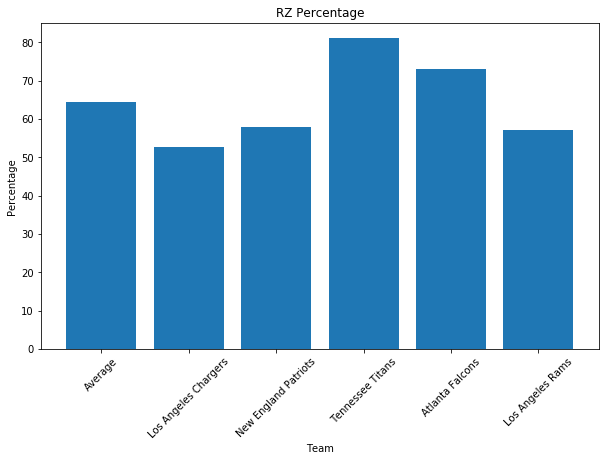

In [225]:
average, lac, chargers = print_metric_team(kicking_defense, 'RZ_Percent', kick_def1)
average, newengland, patriots = print_metric_team(kicking_defense, 'RZ_Percent', kick_def2)
average, tennessee, titans = print_metric_team(kicking_defense, 'RZ_Percent', kick_def3)
average, atlanta, falcons = print_metric_team(kicking_defense, 'RZ_Percent', kick_def4)
average, lar, rams = print_metric_team(kicking_defense, 'RZ_Percent', kick_def5)

x = ['Average', lac, newengland, tennessee, atlanta, lar]
y = [average, chargers, patriots, titans, falcons, rams]

bar_plot(x, y, 'RZ Percentage', 'Team', 'Percentage')

Avg Num_Field_Goals_Allowed: 11.6
Los Angeles Chargers Num_Field_Goals_Allowed: 17.0
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 11.6
New England Patriots Num_Field_Goals_Allowed: 15.0
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 11.6
Tennessee Titans Num_Field_Goals_Allowed: 4.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 11.6
Atlanta Falcons Num_Field_Goals_Allowed: 10.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 11.6
Los Angeles Rams Num_Field_Goals_Allowed: 11.0
--------------------------------------------------


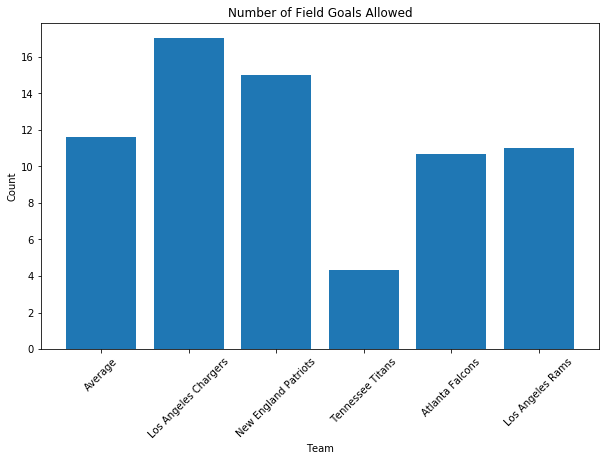

In [226]:
average, lac, chargers = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def1)
average, newengland, patriots = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def2)
average, tennessee, titans = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def3)
average, atlanta, falcons = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def4)
average, lar, rams = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def5)

x = ['Average', lac, newengland, tennessee, atlanta, lar]
y = [average, chargers, patriots, titans, falcons, rams]

bar_plot(x, y, 'Number of Field Goals Allowed', 'Team', 'Count')

Avg Ttl_TDs: 17.4
Los Angeles Chargers Ttl_TDs: 15
--------------------------------------------------
Avg Ttl_TDs: 17.4
New England Patriots Ttl_TDs: 14
--------------------------------------------------
Avg Ttl_TDs: 17.4
Tennessee Titans Ttl_TDs: 20
--------------------------------------------------
Avg Ttl_TDs: 17.4
Atlanta Falcons Ttl_TDs: 25
--------------------------------------------------
Avg Ttl_TDs: 17.4
Los Angeles Rams Ttl_TDs: 13
--------------------------------------------------


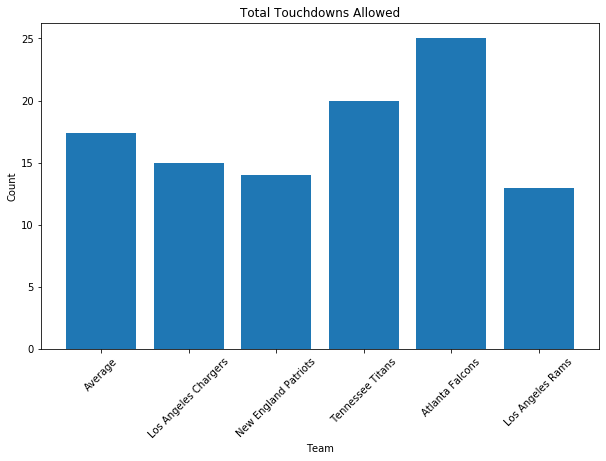

In [229]:
average, lac, chargers = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def1)
average, newengland, patriots = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def2)
average, tennessee, titans = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def3)
average, atlanta, falcons = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def4)
average, lar, rams = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def5)

x = ['Average', lac, newengland, tennessee, atlanta, lar]
y = [average, chargers, patriots, titans, falcons, rams]

bar_plot(x, y, 'Total Touchdowns Allowed', 'Team', 'Count')

So while Joey Slye has accumulated more field goals so far this season and Tyler Bass has made the most extra points, my kicker this week is McManus. The Chargers have allowed only 15 touchdowns so far this season and have the lowest red zone percentage of all the teams I'm looking at. Not to mention teams have made 17 field goals against them (roughly) - that's more than any other team. McManus is reliable and so long as it's not snowing in Denver this week, he's my guy.